### Import impotant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


In [51]:
df = pd.read_csv("Telco-Customer-Churn.csv")
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [21]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


### **`Identify Missing Values`**

In [22]:
df.isnull().sum() / len(df) * 100 # Percentage of missing values

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [28]:
df["TotalCharges"] = df["TotalCharges"].astype(float)
print(df["TotalCharges"].dtype)

float64


In [32]:
df["SeniorCitizen"].value_counts(normalize= True) * 100

SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='SeniorCitizen', ylabel='count'>

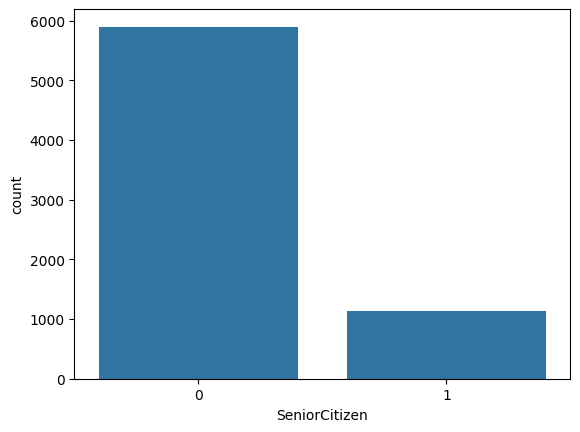

In [41]:
sns.countplot(x= 'SeniorCitizen', data= df)



<Axes: xlabel='SeniorCitizen', ylabel='Count'>

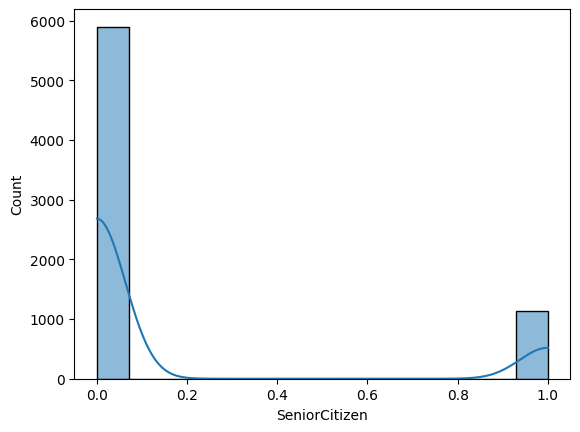

In [42]:
sns.histplot(df['SeniorCitizen'], kde= True)

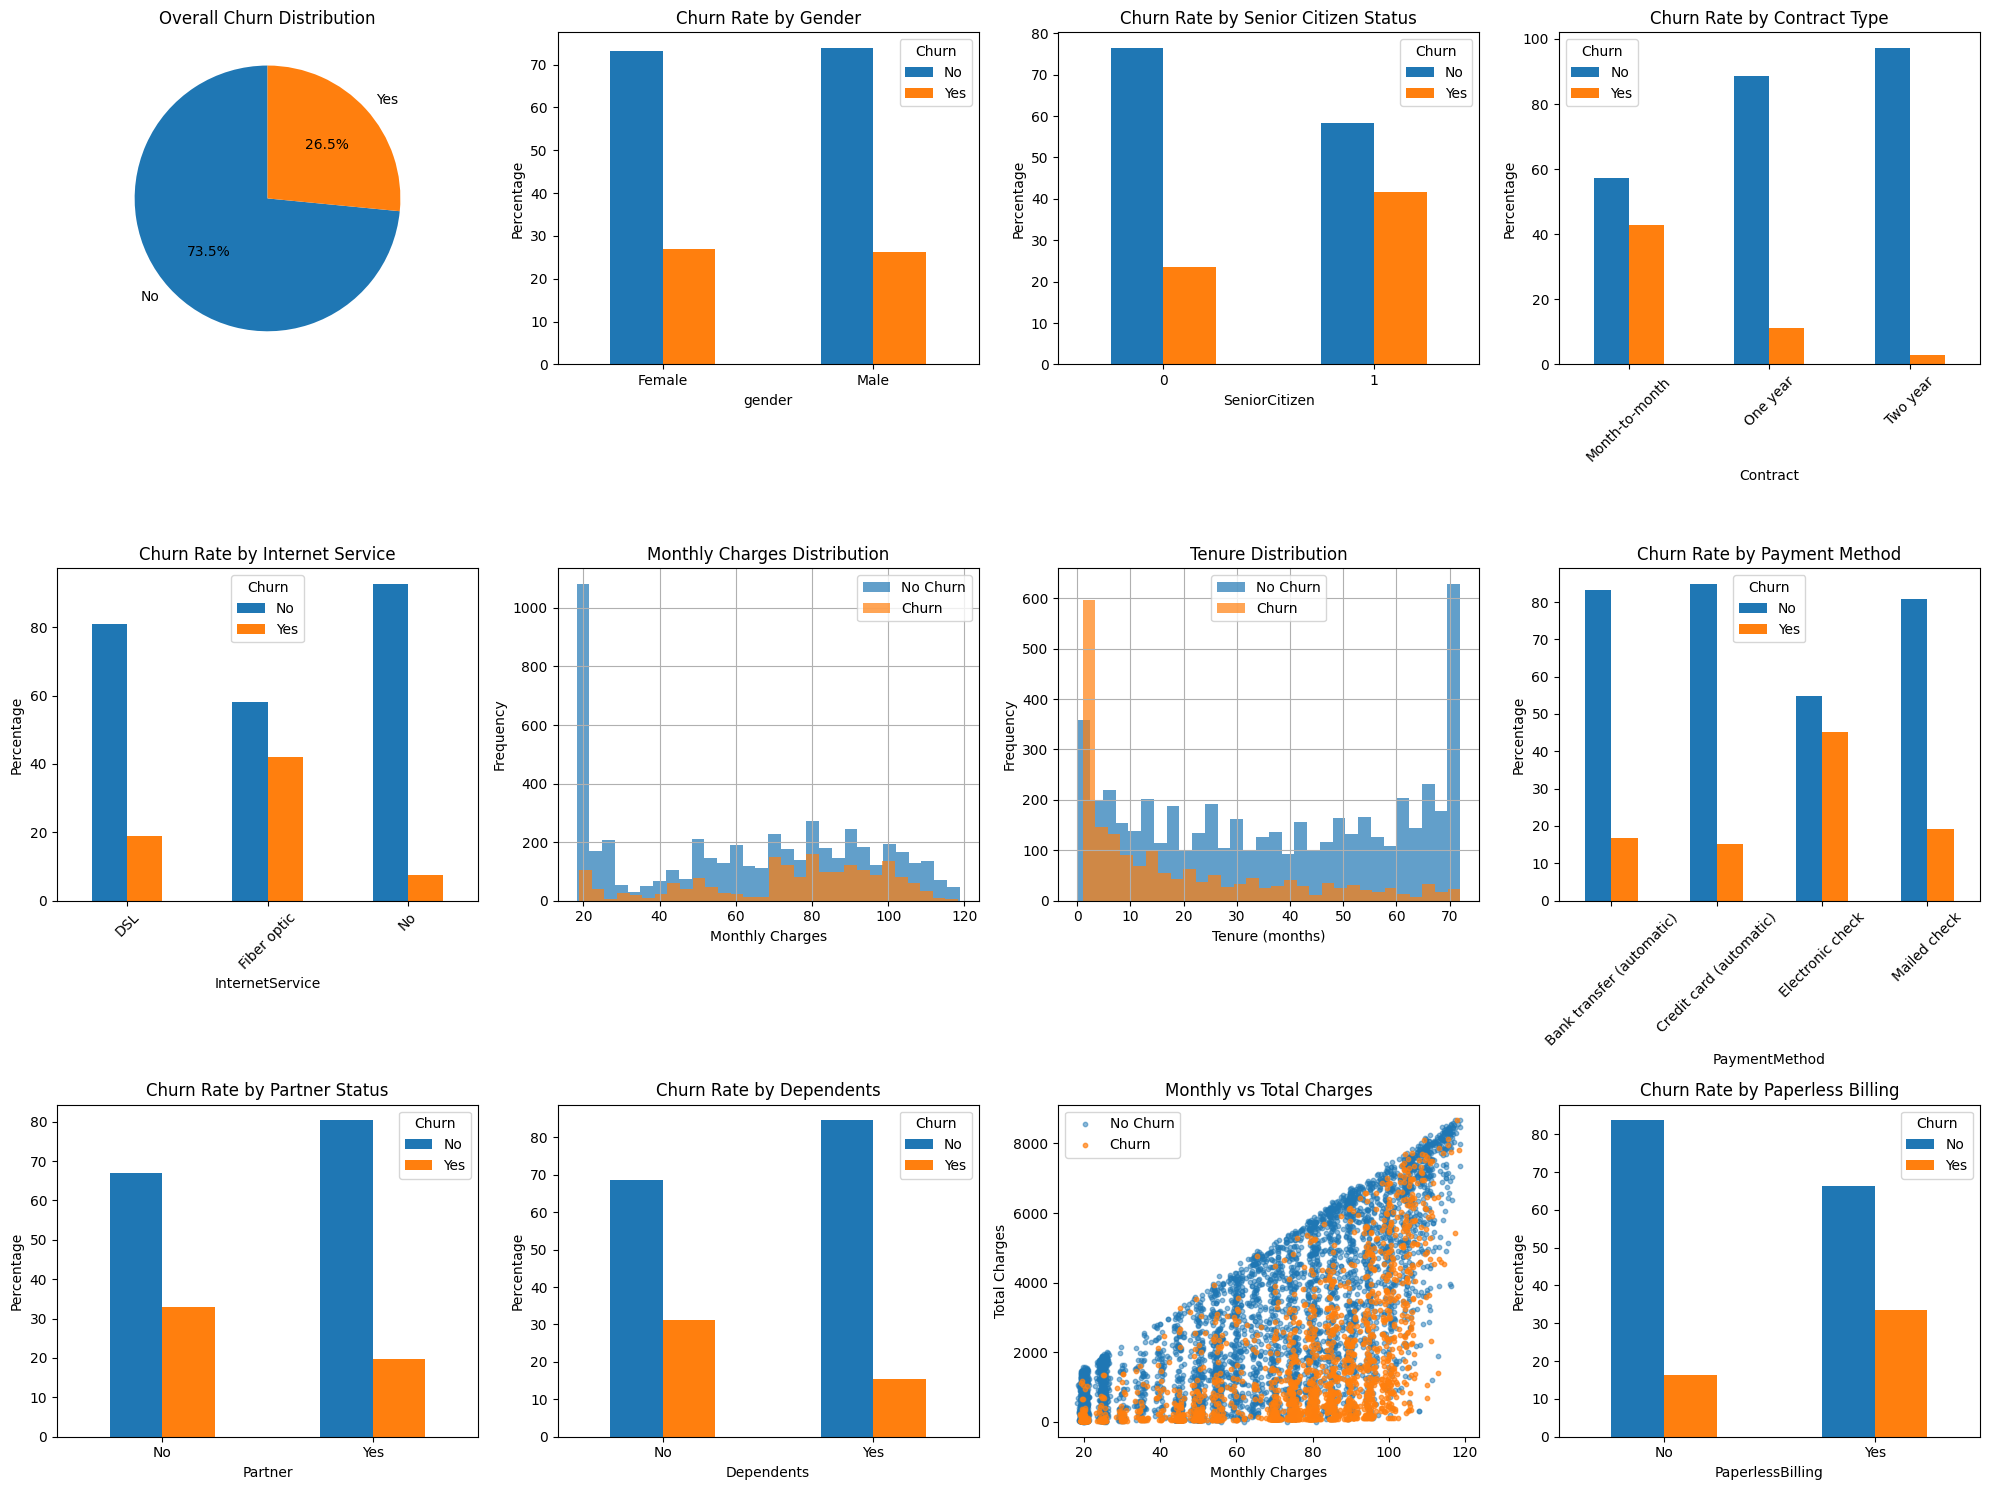

In [45]:
# Create comprehensive visualizations for churn analysis
plt.figure(figsize=(20, 15))

# 1. Churn distribution
plt.subplot(3, 4, 1)
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Churn Distribution')

# 2. Churn by gender
plt.subplot(3, 4, 2)
churn_gender = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100
churn_gender.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# 3. Churn by senior citizen status
plt.subplot(3, 4, 3)
churn_senior = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
churn_senior.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Senior Citizen Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# 4. Churn by contract type
plt.subplot(3, 4, 4)
churn_contract = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
churn_contract.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# 5. Churn by internet service
plt.subplot(3, 4, 5)
churn_internet = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
churn_internet.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Internet Service')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# 6. Monthly charges distribution by churn
plt.subplot(3, 4, 6)
df[df['Churn'] == 'No']['MonthlyCharges'].hist(alpha=0.7, label='No Churn', bins=30)
df[df['Churn'] == 'Yes']['MonthlyCharges'].hist(alpha=0.7, label='Churn', bins=30)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend()

# 7. Tenure distribution by churn
plt.subplot(3, 4, 7)
df[df['Churn'] == 'No']['tenure'].hist(alpha=0.7, label='No Churn', bins=30)
df[df['Churn'] == 'Yes']['tenure'].hist(alpha=0.7, label='Churn', bins=30)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.legend()

# 8. Churn by payment method
plt.subplot(3, 4, 8)
churn_payment = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
churn_payment.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Payment Method')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# 9. Churn by partner status
plt.subplot(3, 4, 9)
churn_partner = pd.crosstab(df['Partner'], df['Churn'], normalize='index') * 100
churn_partner.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Partner Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# 10. Churn by dependents
plt.subplot(3, 4, 10)
churn_dependents = pd.crosstab(df['Dependents'], df['Churn'], normalize='index') * 100
churn_dependents.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Dependents')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# 11. Total charges vs monthly charges colored by churn
plt.subplot(3, 4, 11)
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']
plt.scatter(not_churned['MonthlyCharges'], not_churned['TotalCharges'], alpha=0.5, label='No Churn', s=10)
plt.scatter(churned['MonthlyCharges'], churned['TotalCharges'], alpha=0.7, label='Churn', s=10)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Monthly vs Total Charges')
plt.legend()

# 12. Churn by paperless billing
plt.subplot(3, 4, 12)
churn_paperless = pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index') * 100
churn_paperless.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Paperless Billing')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [46]:
# Calculate key statistics and insights
print("=== TELCO CUSTOMER CHURN ANALYSIS ===\
")

# Overall churn rate
total_customers = len(df)
churned_customers = len(df[df['Churn'] == 'Yes'])
churn_rate = (churned_customers / total_customers) * 100

print("Dataset Overview:")
print("Total customers: " + str(total_customers))
print("Churned customers: " + str(churned_customers))
print("Overall churn rate: " + str(round(churn_rate, 2)) + "%\
")

# Key insights by category
print("Key Insights:")

# Contract type impact
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print("Churn rates by contract type:")
for contract, rate in contract_churn.items():
    print("  " + contract + ": " + str(round(rate, 1)) + "%")

# Internet service impact
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print("\
Churn rates by internet service:")
for service, rate in internet_churn.items():
    print("  " + service + ": " + str(round(rate, 1)) + "%")

# Senior citizen impact
senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print("\
Churn rates by age group:")
print("  Non-senior citizens: " + str(round(senior_churn[0], 1)) + "%")
print("  Senior citizens: " + str(round(senior_churn[1], 1)) + "%")

# Payment method impact
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print("\
Churn rates by payment method:")
for method, rate in payment_churn.items():
    print("  " + method + ": " + str(round(rate, 1)) + "%")

# Average charges comparison
churned_avg_monthly = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
not_churned_avg_monthly = df[df['Churn'] == 'No']['MonthlyCharges'].mean()
churned_avg_total = df[df['Churn'] == 'Yes']['TotalCharges'].mean()
not_churned_avg_total = df[df['Churn'] == 'No']['TotalCharges'].mean()

print("\
Average charges comparison:")
print("Churned customers - Monthly: $" + str(round(churned_avg_monthly, 2)) + ", Total: $" + str(round(churned_avg_total, 2)))
print("Retained customers - Monthly: $" + str(round(not_churned_avg_monthly, 2)) + ", Total: $" + str(round(not_churned_avg_total, 2)))

# Tenure comparison
churned_avg_tenure = df[df['Churn'] == 'Yes']['tenure'].mean()
not_churned_avg_tenure = df[df['Churn'] == 'No']['tenure'].mean()
print("\
Average tenure comparison:")
print("Churned customers: " + str(round(churned_avg_tenure, 1)) + " months")
print("Retained customers: " + str(round(not_churned_avg_tenure, 1)) + " months")

=== TELCO CUSTOMER CHURN ANALYSIS ===
Dataset Overview:
Total customers: 7043
Churned customers: 1869
Overall churn rate: 26.54%
Key Insights:
Churn rates by contract type:
  Month-to-month: 42.7%
  One year: 11.3%
  Two year: 2.8%
Churn rates by internet service:
  DSL: 19.0%
  Fiber optic: 41.9%
  No: 7.4%
Churn rates by age group:
  Non-senior citizens: 23.6%
  Senior citizens: 41.7%
Churn rates by payment method:
  Bank transfer (automatic): 16.7%
  Credit card (automatic): 15.2%
  Electronic check: 45.3%
  Mailed check: 19.1%
Average charges comparison:
Churned customers - Monthly: $74.44, Total: $1531.8
Retained customers - Monthly: $61.27, Total: $2549.91
Average tenure comparison:
Churned customers: 18.0 months
Retained customers: 37.6 months


Model trained.
Top 15 aggregated features:
     OriginalFeature  TotalImportance
18      TotalCharges         0.146016
16            tenure         0.130120
17    MonthlyCharges         0.125417
12          Contract         0.124305
14     PaymentMethod         0.064379
6     OnlineSecurity         0.052842
9        TechSupport         0.045744
5    InternetService         0.040938
0             gender         0.032227
7       OnlineBackup         0.031996
8   DeviceProtection         0.028499
13  PaperlessBilling         0.027803
1            Partner         0.026963
4      MultipleLines         0.026115
11   StreamingMovies         0.025505


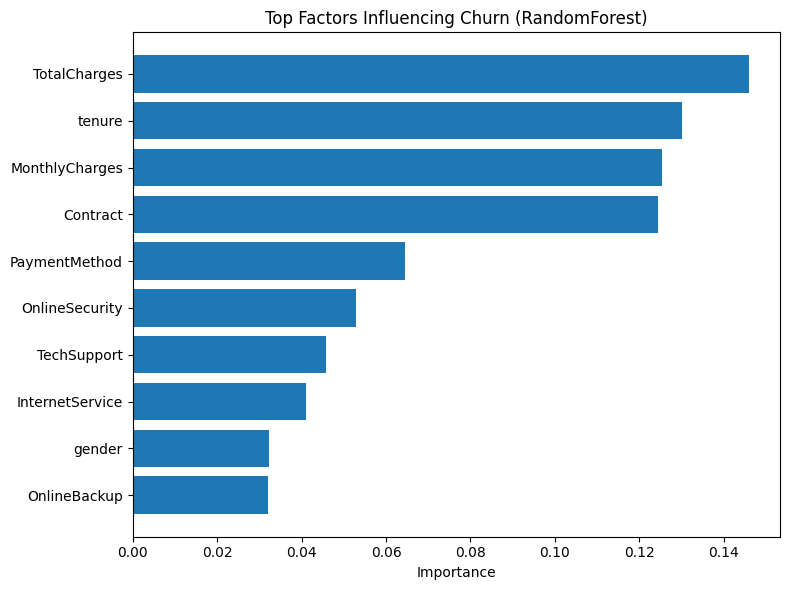

In [48]:
# Determine top factors influencing churn using RandomForest feature importances
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separate features and target
y = df['Churn'].map({'No': 0, 'Yes': 1})
X = df.drop(['Churn', 'customerID'], axis=1)

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Build preprocessing and model pipeline
preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
pipe = Pipeline([('preprocess', preprocess), ('model', rf)])

# Fit model
pipe.fit(X, y)
print("Model trained.")

# Extract feature importances
# Get one-hot feature names
encoder = pipe.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = encoder.get_feature_names_out(cat_cols)
all_feature_names = list(encoded_cat_names) + num_cols
importances = pipe.named_steps['model'].feature_importances_

feat_imp = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Aggregate one-hot importances back to original feature level
orig_map = {}
for name, imp in zip(all_feature_names, importances):
    orig_feature = name.split('_')[0] if name in encoded_cat_names else name
    orig_map[orig_feature] = orig_map.get(orig_feature, 0) + imp
agg_imp = pd.DataFrame(list(orig_map.items()), columns=['OriginalFeature', 'TotalImportance']).sort_values(by='TotalImportance', ascending=False)

print("Top 15 aggregated features:")
print(agg_imp.head(15))

# Plot
plt.figure(figsize=(8,6))
plt.barh(agg_imp.head(10)['OriginalFeature'][::-1], agg_imp.head(10)['TotalImportance'][::-1])
plt.title('Top Factors Influencing Churn (RandomForest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
# --- 2. Data Preprocessing (as discussed in Phase 2 guide) ---

print("\n--- Data Preprocessing ---")

# 2.1 Handle 'TotalCharges' column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace= True)
print(f"Missing values in 'TotalCharges' after handling: {df['TotalCharges'].isnull().sum()}")

# 2.2 Convert 'No internet service' and 'No phone service' to 'No' for consistency in some columns
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies']:
    df[col] = df[col].replace('No internet service', 'No')
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

# 2.3 Convert 'Yes'/'No' columns to 1/0 for easier analysis and modeling
# This is crucial for the Num_Addon_Services calculation later
yes_no_cols_to_map = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
                      'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                      'TechSupport', 'StreamingTV', 'StreamingMovies'] # Add all relevant service columns here

for col in yes_no_cols_to_map:
    if col in df.columns and df[col].dtype == 'object': # Only map if it's still an object/string
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# Convert 'gender' to 0/1 (Female: 0, Male: 1 or vice versa)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df.head()

# Remove 'customerID' as it's not a feature for modeling
df.drop('customerID', axis=1, inplace= True)
print("\nDataFrame after basic preprocessing:")
df.info()



--- Data Preprocessing ---
Missing values in 'TotalCharges' after handling: 0

DataFrame after basic preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7

C:\Users\GNG\AppData\Local\Temp\ipykernel_17296\2480050530.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace= True)


In [54]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [55]:
# --- 3. Feature Engineering (for unique angle) ---

print("\n--- Feature Engineering ---")

# 3.1 Tenure Groupings (for lifecycle analysis)
bins = [0, 12, 24, 48, 60, df['tenure'].max()]
labels = ['0-1 Year', '1-2 Years', '2-4 Years', '4-5 Years', '5+ Years']
df['Tenure_Group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

# 3.2 Average Monthly Spend (more robust than MonthlyCharges_Per_Tenure)
df['Avg_Monthly_Spend'] = df.apply(lambda row: row['TotalCharges'] / row['tenure'] if row['tenure'] > 0 else row['MonthlyCharges'], axis=1)

# 3.3 Has Multiple Services (Bundle effect) - **THE CRITICAL FIX IS HERE**
# Ensure InternetService is also a numeric flag for proper summing
df['InternetService_Flag'] = df['InternetService'].apply(lambda x: 0 if x == 'No' else 1)

# List all relevant add-on service columns that should be 1/0
# Make sure these are already mapped to 1/0 by the 'yes_no_cols_to_map' loop above
service_sum_cols = [
    'PhoneService',     
    'MultipleLines',    
    'OnlineSecurity',   
    'OnlineBackup',     
    'DeviceProtection', 
    'TechSupport',      
    'StreamingTV',      
    'StreamingMovies',    
    'InternetService_Flag'
]

# Sum them up. All columns in service_sum_cols should now be numeric (0 or 1).
df['Num_Addon_Services'] = df[service_sum_cols].sum(axis=1)

print("\nCreated 'Num_Addon_Services' feature:")
print(df['Num_Addon_Services'].value_counts().sort_index())

# 3.4 Simpler ratio for TotalCharges vs. MonthlyCharges
df['Total_to_Monthly_Ratio'] = df.apply(lambda row: row['TotalCharges'] / row['MonthlyCharges'] if row['MonthlyCharges'] > 0 else 0, axis=1)

print("\nCreated 'Total_to_Monthly_Ratio' feature.")
display(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Total_to_Monthly_Ratio']].head())


--- Feature Engineering ---

Created 'Num_Addon_Services' feature:
Num_Addon_Services
1    1264
2     859
3     846
4     965
5     922
6     908
7     676
8     395
9     208
Name: count, dtype: int64

Created 'Total_to_Monthly_Ratio' feature.


,tenure,MonthlyCharges,TotalCharges,Total_to_Monthly_Ratio
0,1,29.85,29.85,1.000000
1,34,56.95,1889.50,33.178227
2,2,53.85,108.15,2.008357
3,45,42.30,1840.75,43.516548
4,2,70.70,151.65,2.144979



--- Exploratory Data Analysis (EDA) ---

Churn Distribution:
Total Customers: 7043
Non-Churned (0): 5174 (73.46%)
Churned (1): 1869 (26.54%)


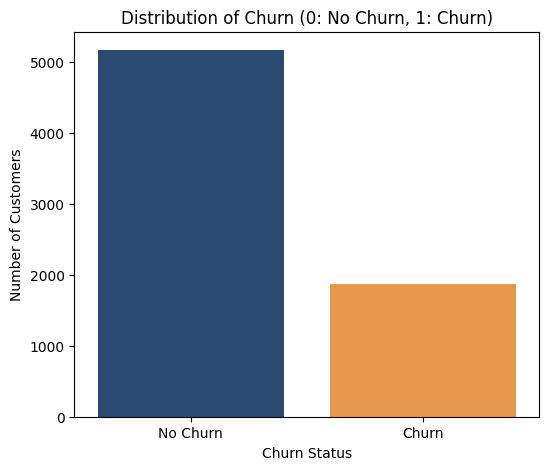

In [56]:
# --- 4. Exploratory Data Analysis (EDA) ---

print("\n--- Exploratory Data Analysis (EDA) ---")

# Define custom color palette
COLORS = {
    'primary_deep': '#1F497D',      # Deep Blue - for main data
    'primary_medium': '#4A7ABF',    # Medium Blue - for variations
    'primary_light': '#7DA0D9',     # Light Blue - for secondary data
    'accent_orange': '#FF9933'      # Orange - for highlighting/alerts
}

# --- 4.1 Churn Distribution ---
print("\nChurn Distribution:")
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

print(f"Total Customers: {df.shape[0]}")
print(f"Non-Churned (0): {churn_counts[0]} ({churn_percentages[0]:.2f}%)")
print(f"Churned (1): {churn_counts[1]} ({churn_percentages[1]:.2f}%)")

plt.figure(figsize=(6, 5))
# Use custom colors: Deep blue for No Churn, Orange for Churn (alert/attention)
custom_palette = [COLORS['primary_deep'], COLORS['accent_orange']]
sns.countplot(x='Churn', hue='Churn', data=df, palette=custom_palette, legend=False)
plt.title('Distribution of Churn (0: No Churn, 1: Churn)')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()


--- Univariate Analysis ---

Analyzing 10 categorical features:


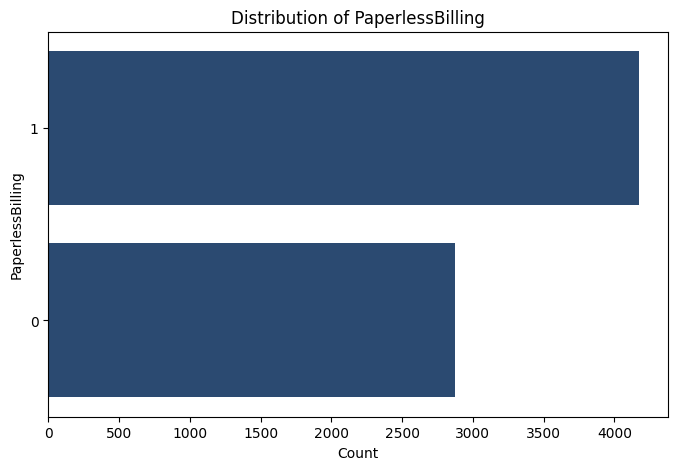


Value Counts for PaperlessBilling:
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64
------------------------------


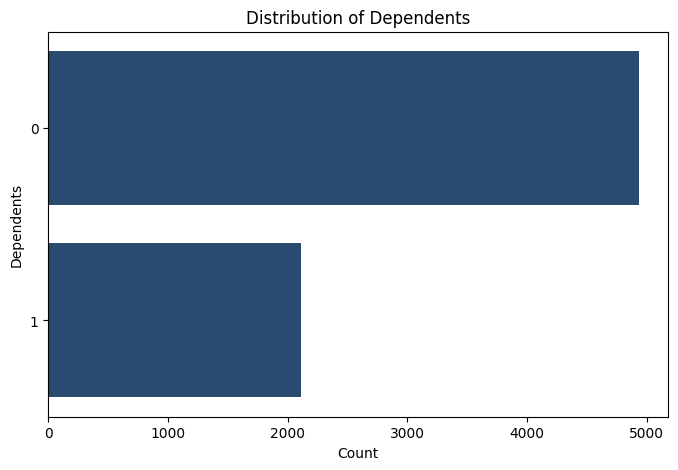


Value Counts for Dependents:
Dependents
0    4933
1    2110
Name: count, dtype: int64
------------------------------


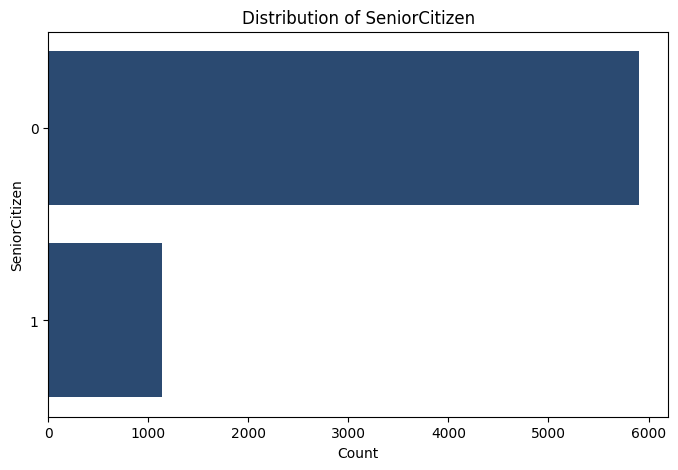


Value Counts for SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
------------------------------


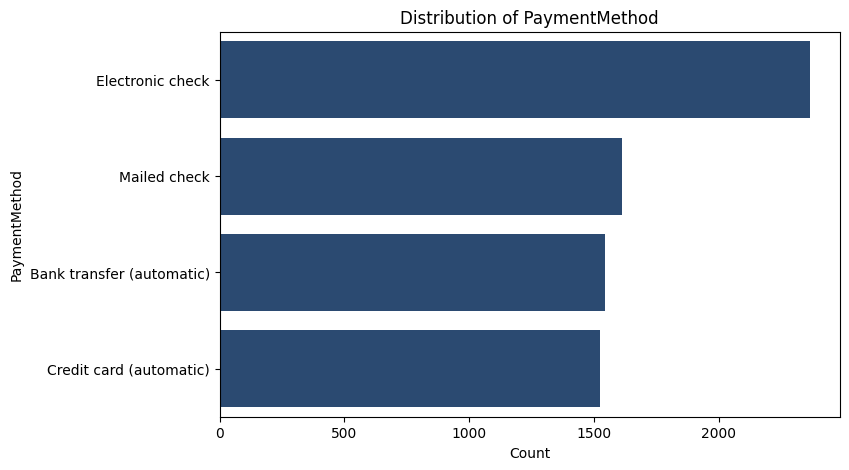


Value Counts for PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
------------------------------


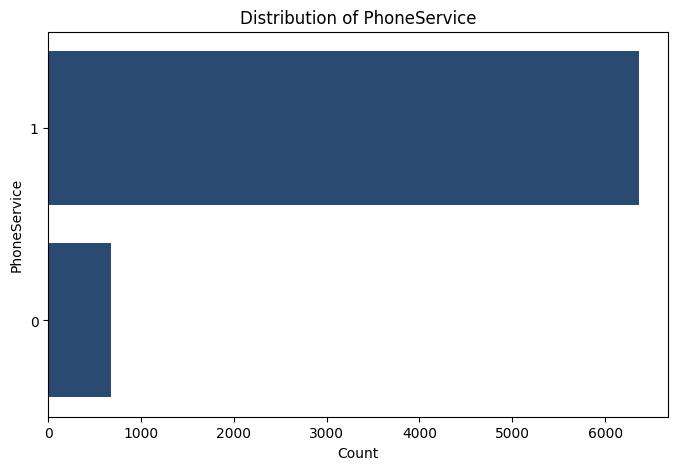


Value Counts for PhoneService:
PhoneService
1    6361
0     682
Name: count, dtype: int64
------------------------------


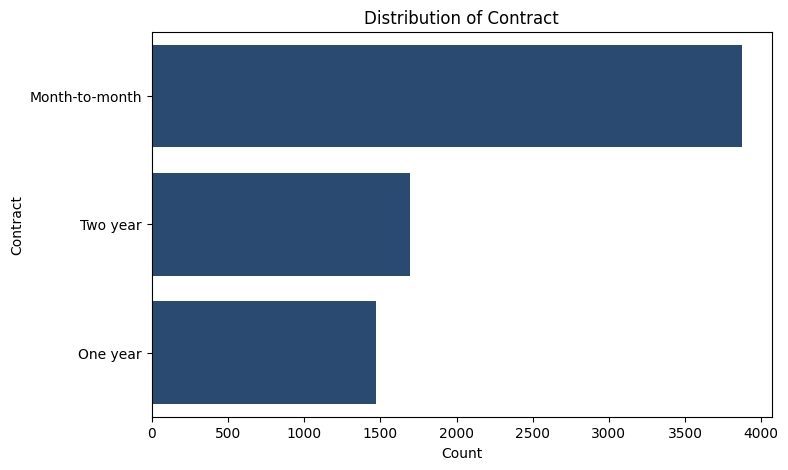


Value Counts for Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
------------------------------


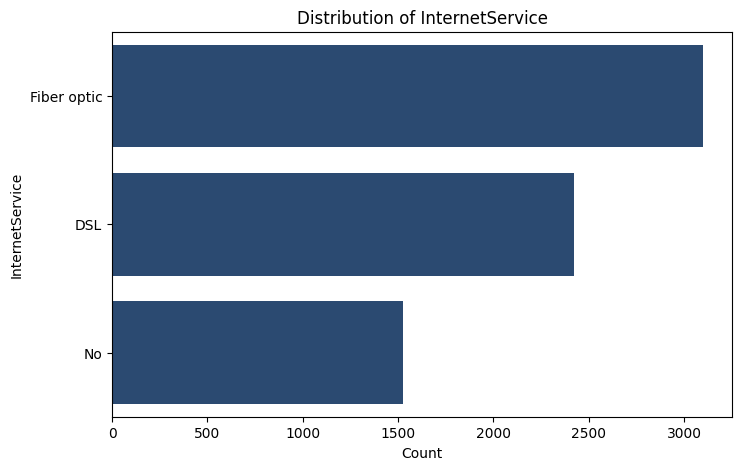


Value Counts for InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
------------------------------


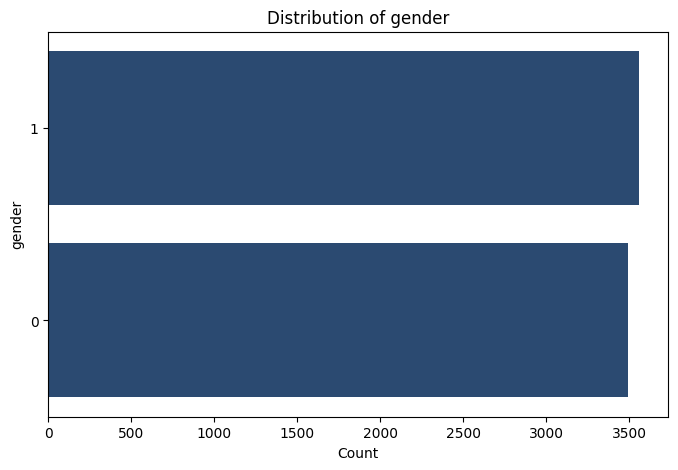


Value Counts for gender:
gender
1    3555
0    3488
Name: count, dtype: int64
------------------------------


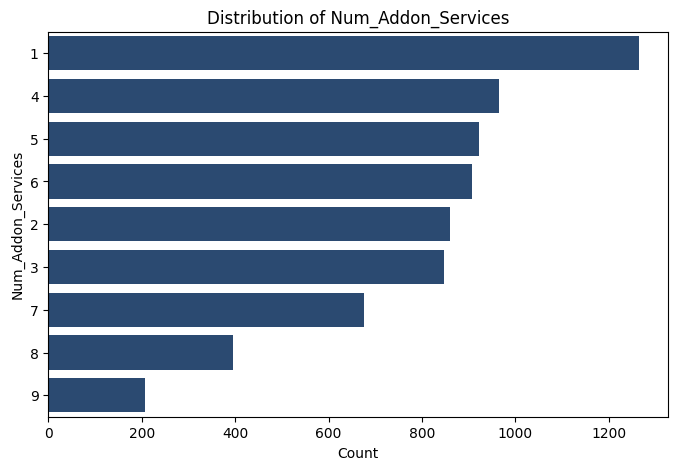


Value Counts for Num_Addon_Services:
Num_Addon_Services
1    1264
4     965
5     922
6     908
2     859
3     846
7     676
8     395
9     208
Name: count, dtype: int64
------------------------------


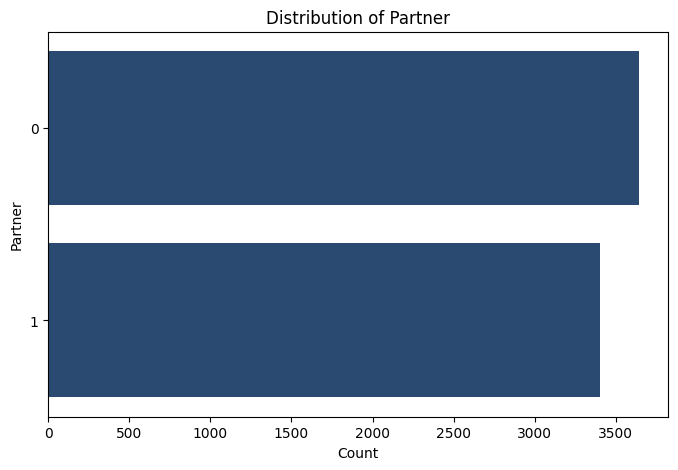


Value Counts for Partner:
Partner
0    3641
1    3402
Name: count, dtype: int64
------------------------------

Analyzing 13 numerical features:


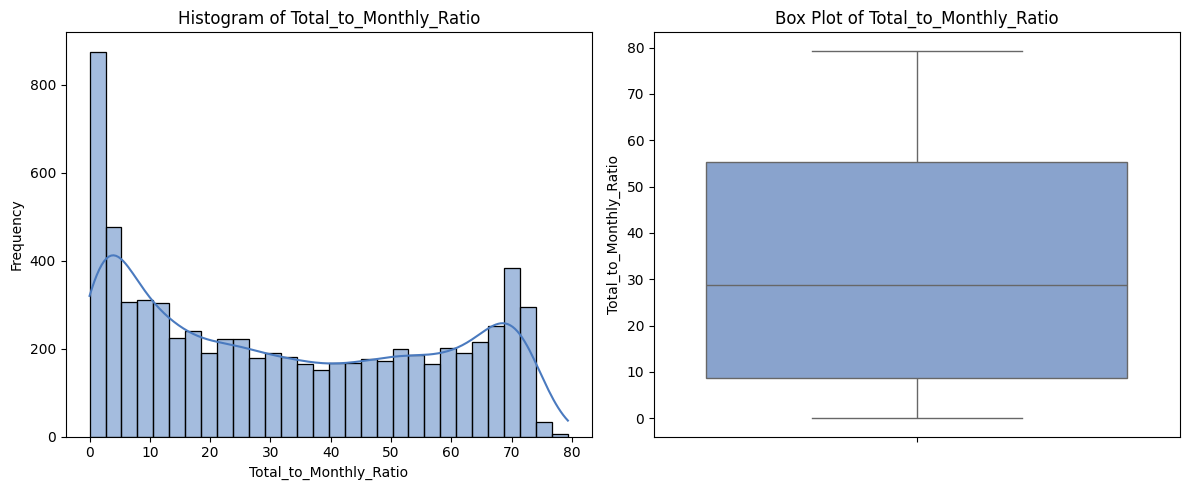


Descriptive Statistics for Total_to_Monthly_Ratio:
count    7043.000000
mean       32.373431
std        24.595943
min         0.000000
25%         8.717230
50%        28.673115
75%        55.244460
max        79.341772
Name: Total_to_Monthly_Ratio, dtype: float64
------------------------------


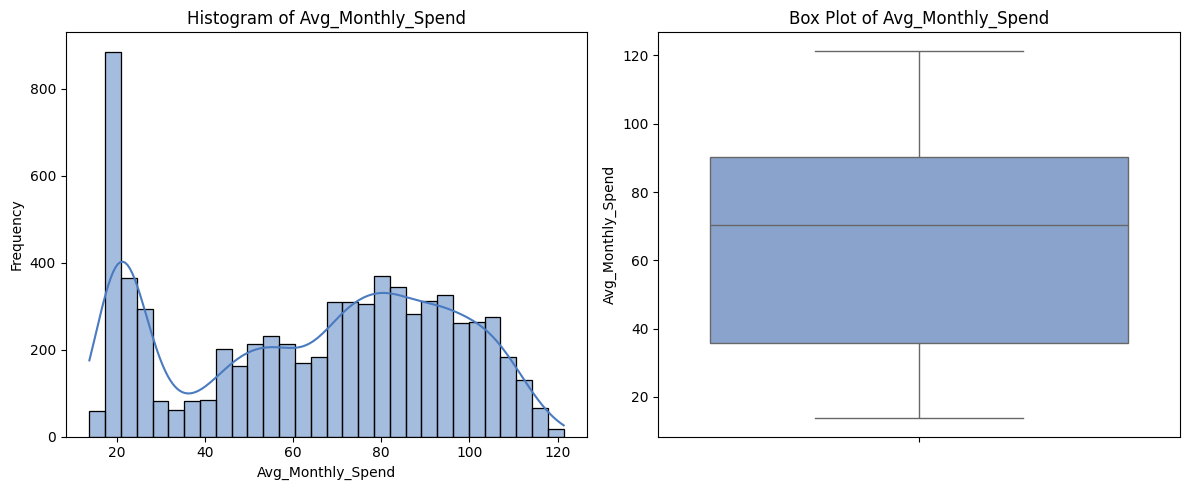


Descriptive Statistics for Avg_Monthly_Spend:
count    7043.000000
mean       64.762906
std        30.189796
min        13.775000
25%        35.935156
50%        70.337500
75%        90.174158
max       121.400000
Name: Avg_Monthly_Spend, dtype: float64
------------------------------


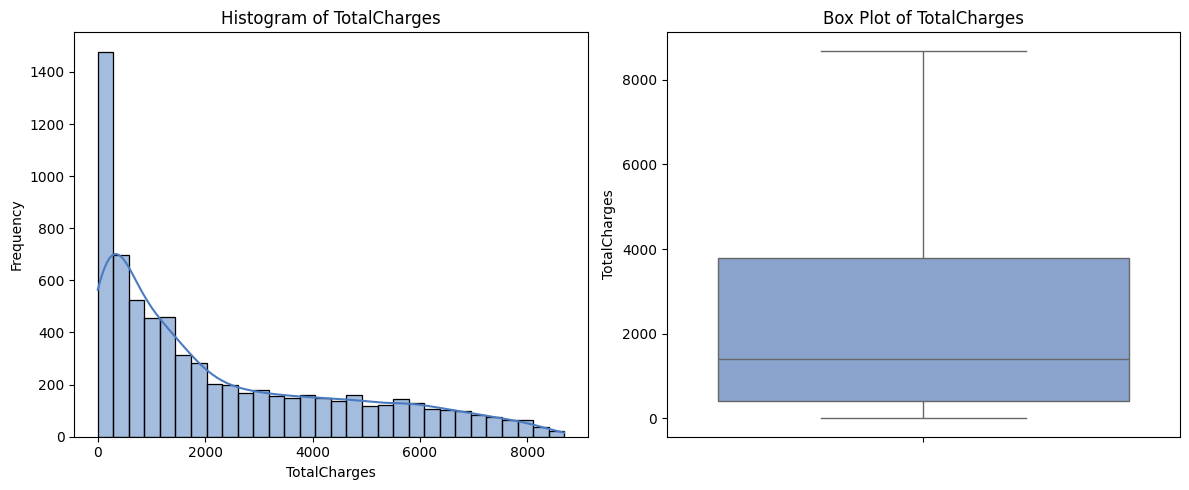


Descriptive Statistics for TotalCharges:
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64
------------------------------


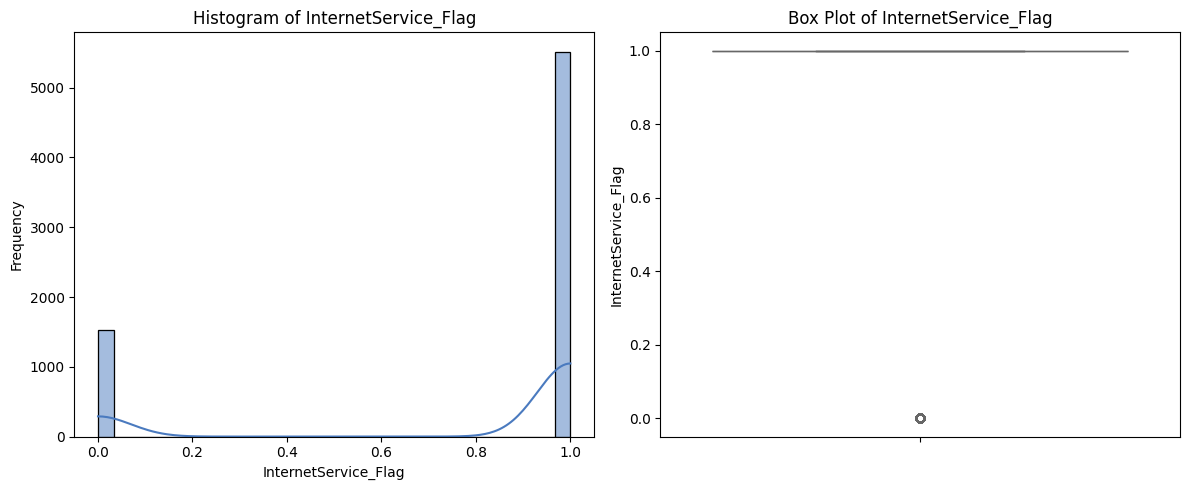


Descriptive Statistics for InternetService_Flag:
count    7043.000000
mean        0.783331
std         0.412004
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: InternetService_Flag, dtype: float64
------------------------------


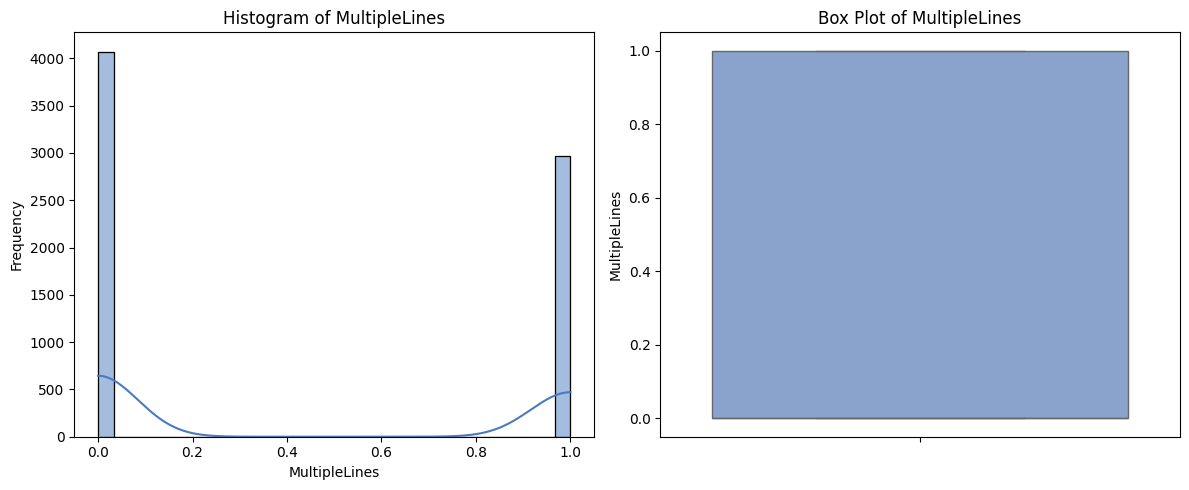


Descriptive Statistics for MultipleLines:
count    7043.000000
mean        0.421837
std         0.493888
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: MultipleLines, dtype: float64
------------------------------


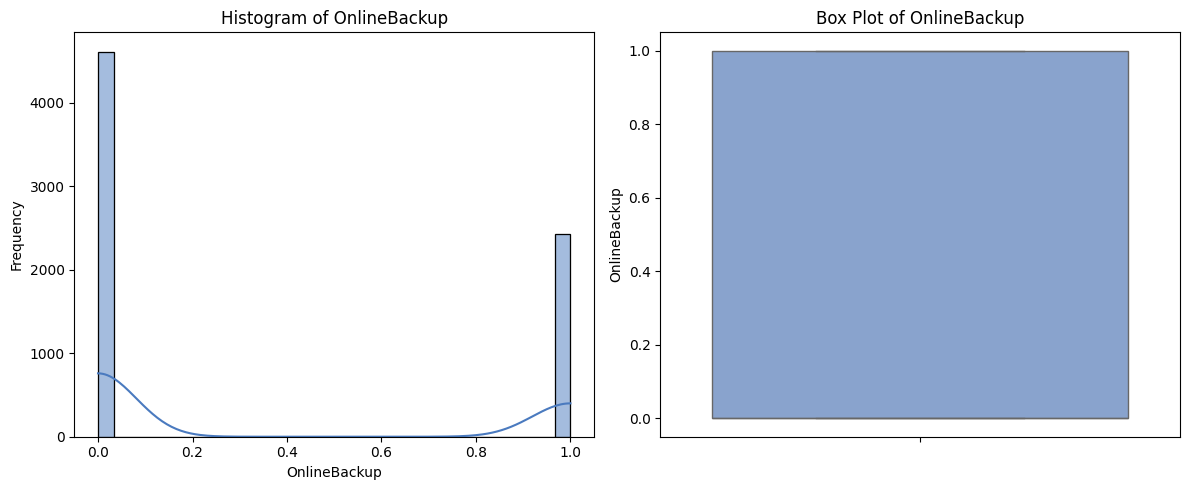


Descriptive Statistics for OnlineBackup:
count    7043.000000
mean        0.344881
std         0.475363
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OnlineBackup, dtype: float64
------------------------------


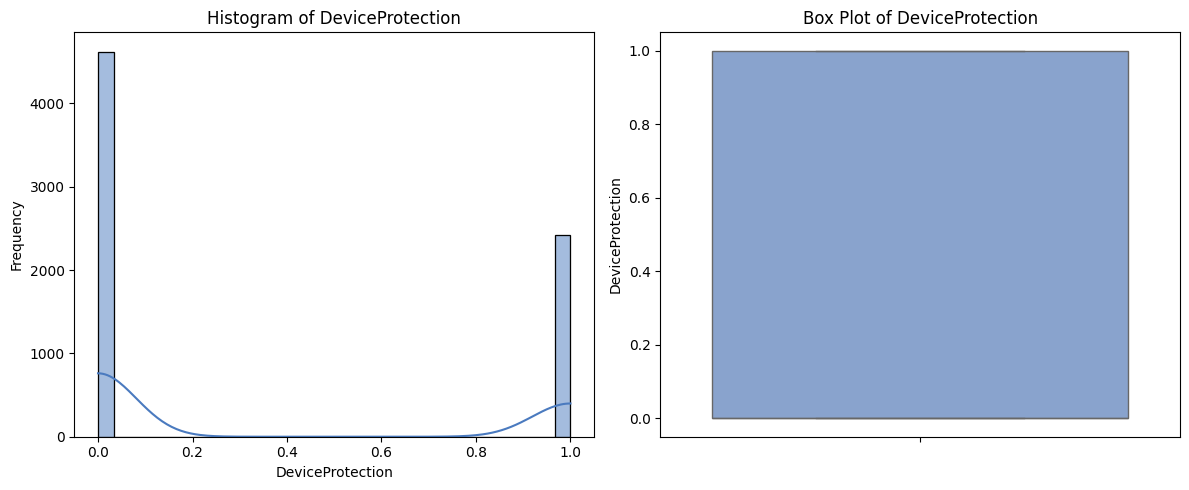


Descriptive Statistics for DeviceProtection:
count    7043.000000
mean        0.343888
std         0.475038
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: DeviceProtection, dtype: float64
------------------------------


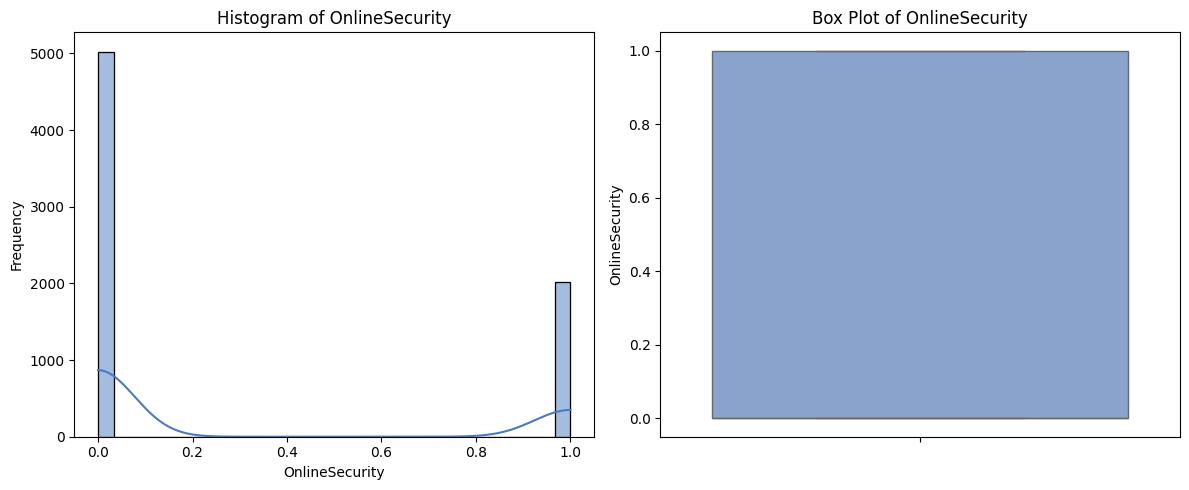


Descriptive Statistics for OnlineSecurity:
count    7043.000000
mean        0.286668
std         0.452237
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OnlineSecurity, dtype: float64
------------------------------


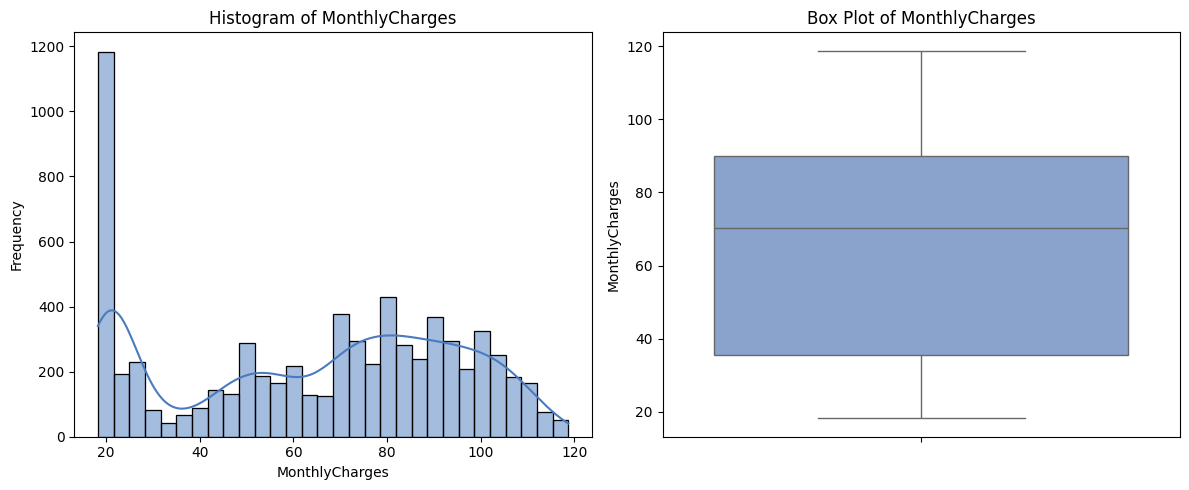


Descriptive Statistics for MonthlyCharges:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
------------------------------


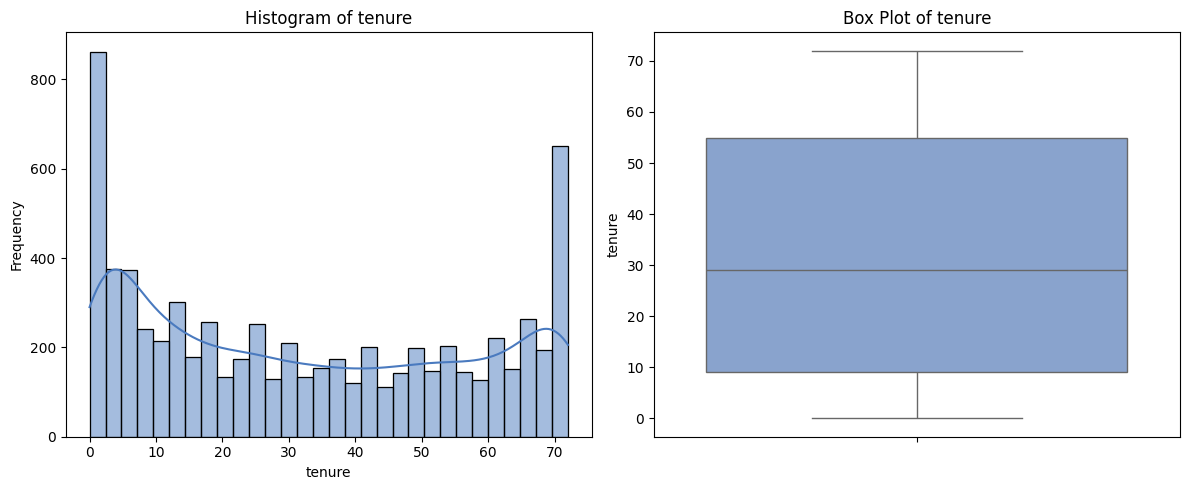


Descriptive Statistics for tenure:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
------------------------------


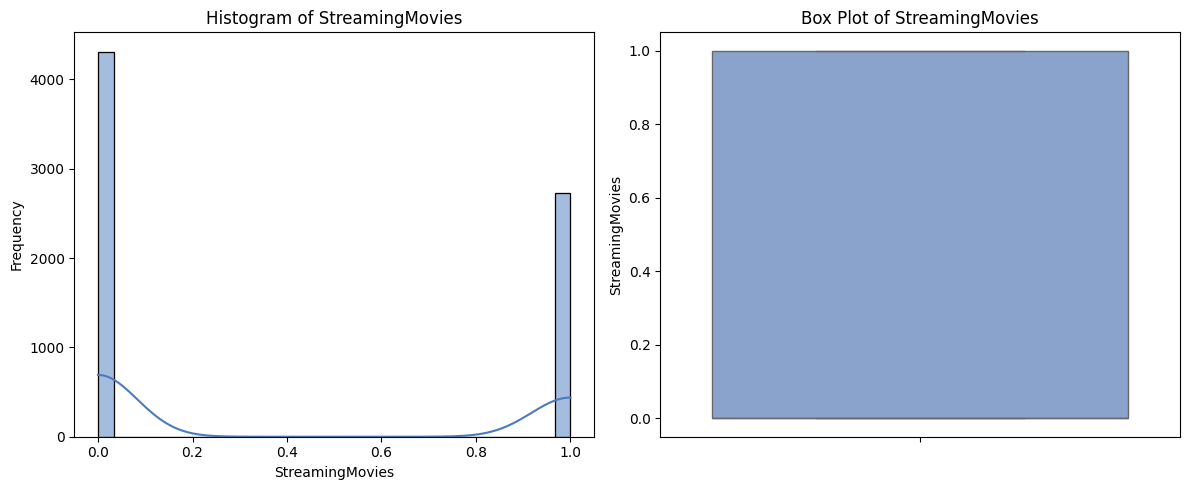


Descriptive Statistics for StreamingMovies:
count    7043.000000
mean        0.387903
std         0.487307
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: StreamingMovies, dtype: float64
------------------------------


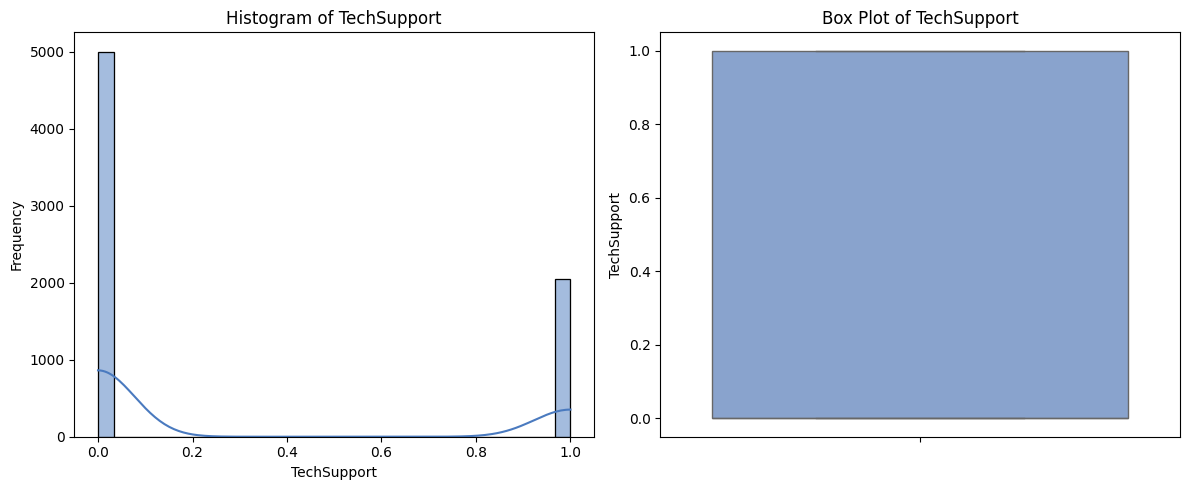


Descriptive Statistics for TechSupport:
count    7043.000000
mean        0.290217
std         0.453895
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: TechSupport, dtype: float64
------------------------------


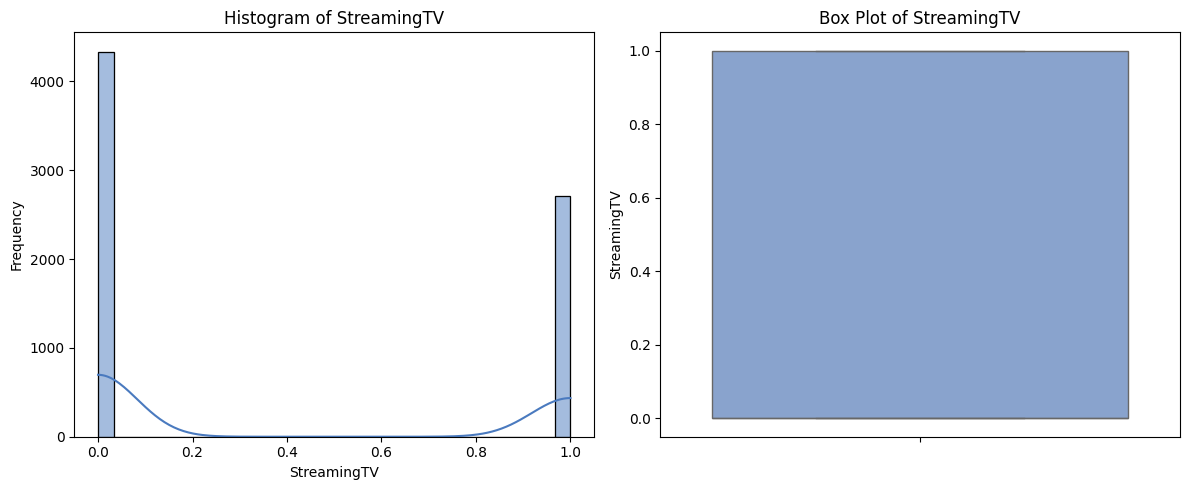


Descriptive Statistics for StreamingTV:
count    7043.000000
mean        0.384353
std         0.486477
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: StreamingTV, dtype: float64
------------------------------


In [57]:
# --- 4.2 Univariate Analysis (Individual Features) ---

print("\n--- Univariate Analysis ---")

# Define custom color palette (if not already defined)
COLORS = {
    'primary_deep': '#1F497D',      # Deep Blue - for main data
    'primary_medium': '#4A7ABF',    # Medium Blue - for variations
    'primary_light': '#7DA0D9',     # Light Blue - for secondary data
    'accent_orange': '#FF9933'      # Orange - for highlighting/alerts
}

# Categorical Features: Loop through relevant categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Add any numerical columns that are treated as categorical (e.g., SeniorCitizen, PhoneService if not dropped)
categorical_cols.extend(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Num_Addon_Services'])
# Filter out 'Churn' if it's in the list, as it's our target
categorical_cols = [col for col in categorical_cols if col != 'Churn']
# Make sure no duplicates
categorical_cols = list(set(categorical_cols)) # Use set to remove duplicates, then convert back to list

print(f"\nAnalyzing {len(categorical_cols)} categorical features:")
for col in categorical_cols:
    if col in df.columns: # Ensure column exists after dropping/renaming
        plt.figure(figsize=(8, 5))
        # Use custom color palette - deep blue for primary data
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, color=COLORS['primary_deep'])
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

        print(f"\nValue Counts for {col}:")
        print(df[col].value_counts())
        print("-" * 30)


# Numerical Features: Loop through relevant numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Num_Addon_Services']]
# Add new engineered numerical features
numerical_cols.extend(['tenure', 'MonthlyCharges', 'TotalCharges', 'Avg_Monthly_Spend', 'Total_to_Monthly_Ratio']) # Ensure tenure/Monthly/Total are in if not included by dtype
numerical_cols = list(set(numerical_cols)) # Remove duplicates

print(f"\nAnalyzing {len(numerical_cols)} numerical features:")
for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1) # Histogram
        # Use medium blue for histogram with KDE
        sns.histplot(df[col], kde=True, bins=30, color=COLORS['primary_medium'])
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2) # Boxplot
        # Use light blue for boxplot
        sns.boxplot(y=df[col], color=COLORS['primary_light'])
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)

        plt.tight_layout()
        plt.show()

        print(f"\nDescriptive Statistics for {col}:")
        print(df[col].describe())
        print("-" * 30)

In [59]:
import warnings
warnings.filterwarnings('ignore')



--- Bivariate Analysis (Feature vs. Churn) ---


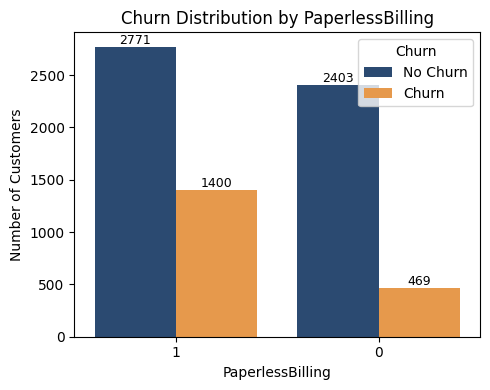


Churn Rate by PaperlessBilling:
  1: 33.57% ⚠️  HIGH CHURN
  0: 16.33%
----------------------------------------


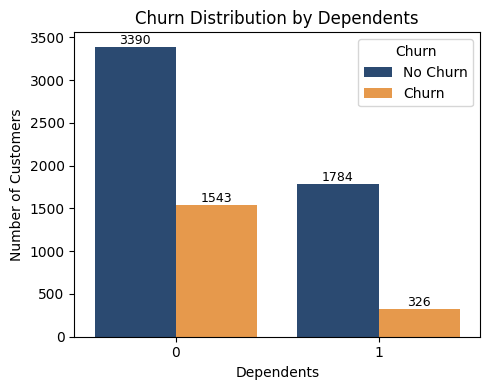


Churn Rate by Dependents:
  0: 31.28% ⚠️  HIGH CHURN
  1: 15.45%
----------------------------------------


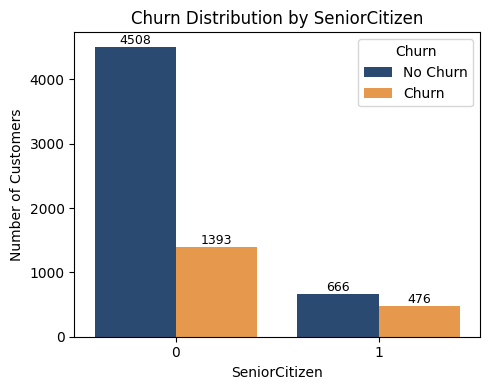


Churn Rate by SeniorCitizen:
  1: 41.68% ⚠️  HIGH CHURN
  0: 23.61%
----------------------------------------


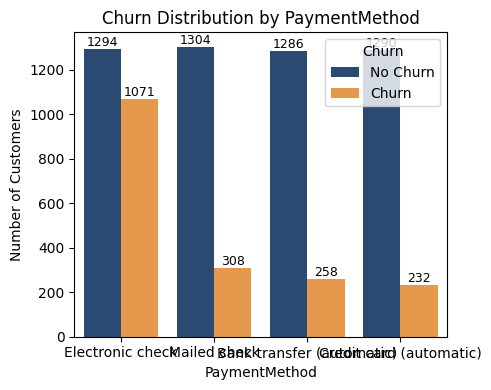


Churn Rate by PaymentMethod:
  Electronic check: 45.29% ⚠️  HIGH CHURN
  Mailed check: 19.11%
  Bank transfer (automatic): 16.71%
  Credit card (automatic): 15.24%
----------------------------------------


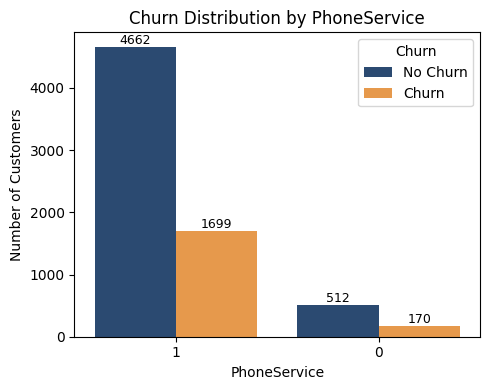


Churn Rate by PhoneService:
  1: 26.71%
  0: 24.93%
----------------------------------------


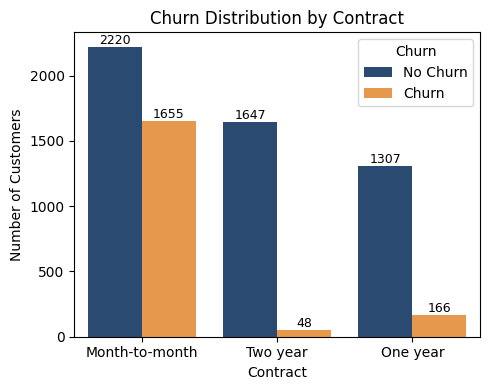


Churn Rate by Contract:
  Month-to-month: 42.71% ⚠️  HIGH CHURN
  One year: 11.27%
  Two year: 2.83%
----------------------------------------


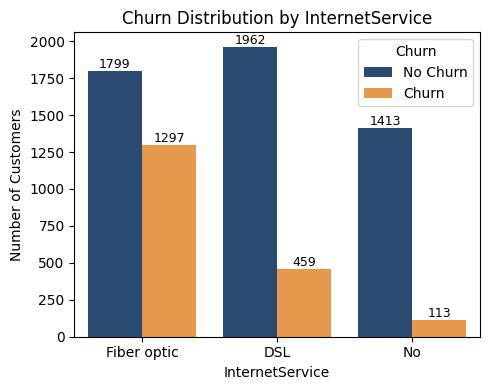


Churn Rate by InternetService:
  Fiber optic: 41.89% ⚠️  HIGH CHURN
  DSL: 18.96%
  No: 7.4%
----------------------------------------


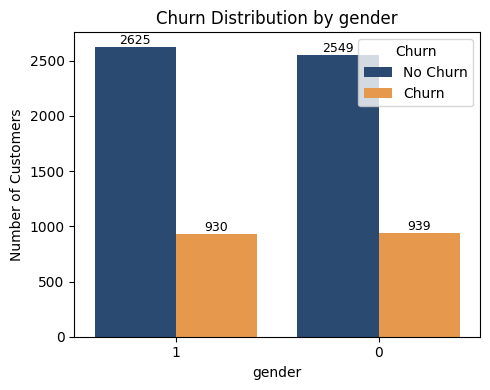


Churn Rate by gender:
  0: 26.92%
  1: 26.16%
----------------------------------------


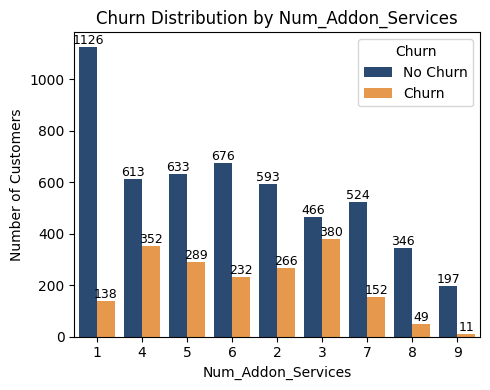


Churn Rate by Num_Addon_Services:
  3: 44.92% ⚠️  HIGH CHURN
  4: 36.48% ⚠️  HIGH CHURN
  5: 31.34% ⚠️  HIGH CHURN
  2: 30.97% ⚠️  HIGH CHURN
  6: 25.55%
  7: 22.49%
  8: 12.41%
  1: 10.92%
  9: 5.29%
----------------------------------------


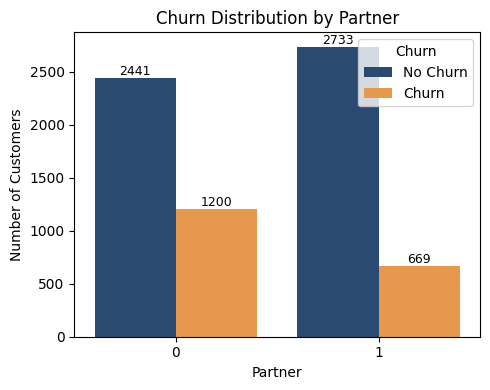


Churn Rate by Partner:
  0: 32.96% ⚠️  HIGH CHURN
  1: 19.66%
----------------------------------------


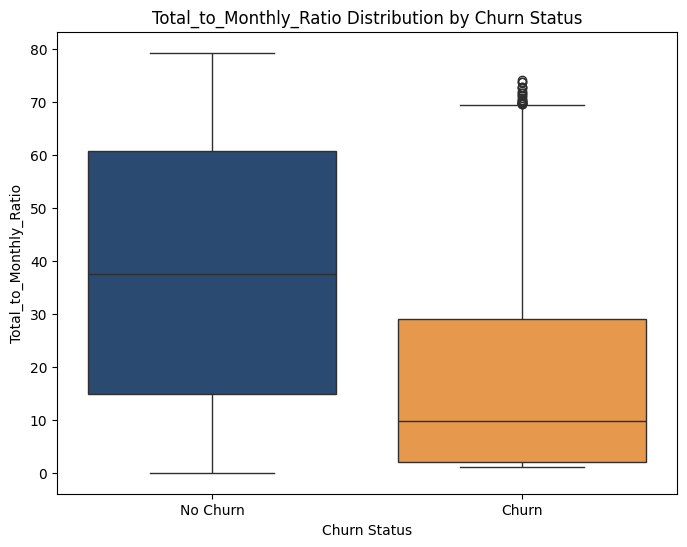


Total_to_Monthly_Ratio Statistics - Churned vs. Non-Churned:
        mean  median
Churn               
0      37.58   37.55
1      17.97    9.71
  💡 INSIGHT: Churned customers have 52.2% lower Total_to_Monthly_Ratio on average
----------------------------------------


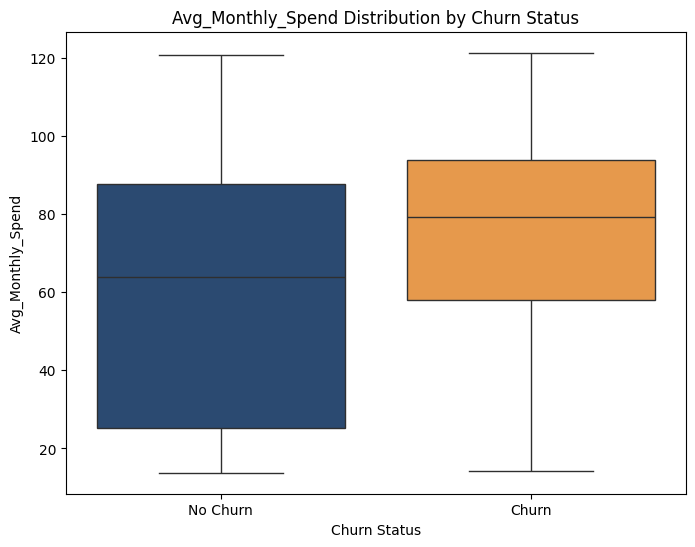


Avg_Monthly_Spend Statistics - Churned vs. Non-Churned:
        mean  median
Churn               
0      61.27   63.98
1      74.43   79.31
  💡 INSIGHT: Churned customers have 21.5% higher Avg_Monthly_Spend on average
----------------------------------------


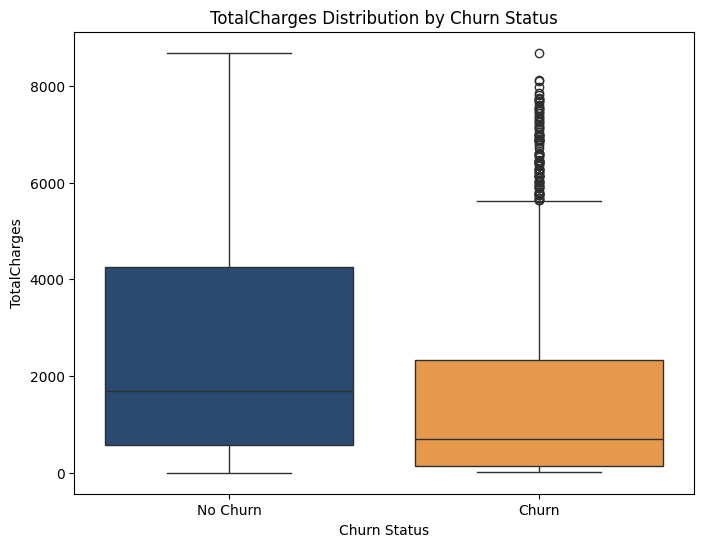


TotalCharges Statistics - Churned vs. Non-Churned:
          mean   median
Churn                  
0      2549.91  1679.52
1      1531.80   703.55
  💡 INSIGHT: Churned customers have 39.9% lower TotalCharges on average
----------------------------------------


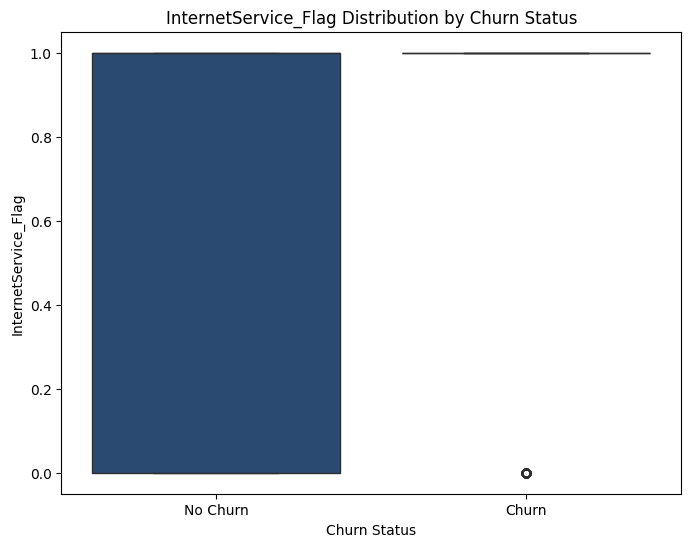


InternetService_Flag Statistics - Churned vs. Non-Churned:
       mean  median
Churn              
0      0.73     1.0
1      0.94     1.0
  💡 INSIGHT: Churned customers have 28.8% higher InternetService_Flag on average
----------------------------------------


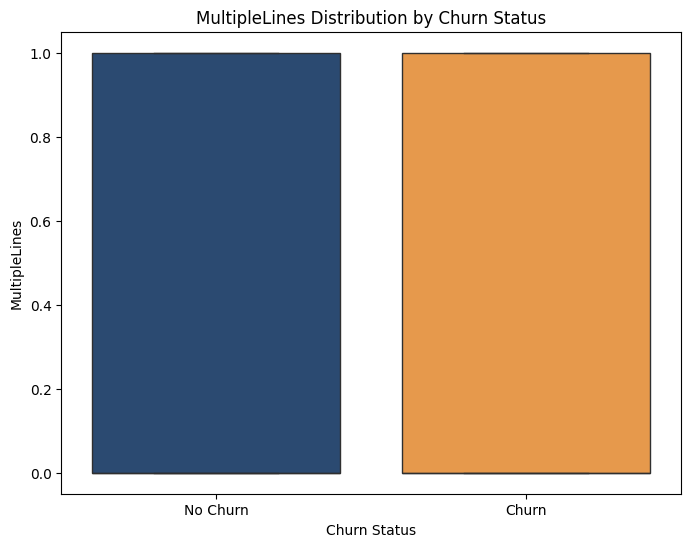


MultipleLines Statistics - Churned vs. Non-Churned:
       mean  median
Churn              
0      0.41     0.0
1      0.45     0.0
----------------------------------------


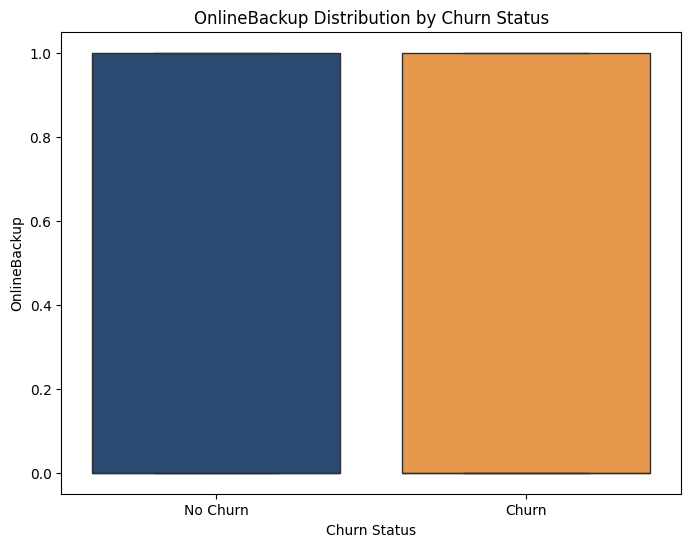


OnlineBackup Statistics - Churned vs. Non-Churned:
       mean  median
Churn              
0      0.37     0.0
1      0.28     0.0
  💡 INSIGHT: Churned customers have 24.3% lower OnlineBackup on average
----------------------------------------


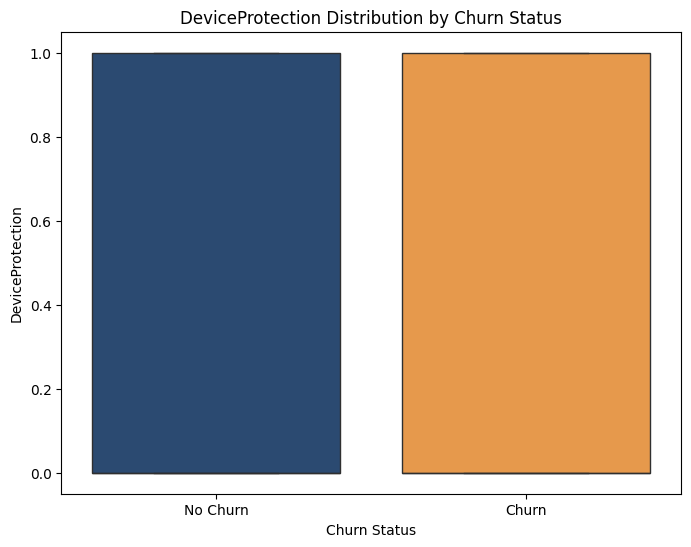


DeviceProtection Statistics - Churned vs. Non-Churned:
       mean  median
Churn              
0      0.36     0.0
1      0.29     0.0
----------------------------------------


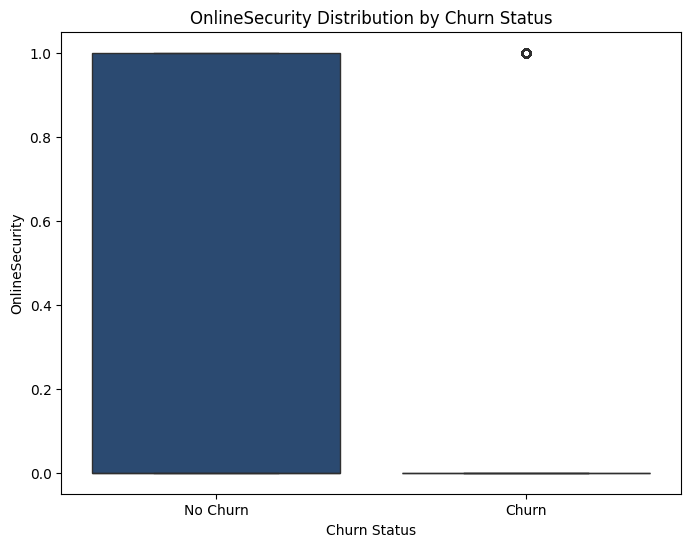


OnlineSecurity Statistics - Churned vs. Non-Churned:
       mean  median
Churn              
0      0.33     0.0
1      0.16     0.0
  💡 INSIGHT: Churned customers have 51.5% lower OnlineSecurity on average
----------------------------------------


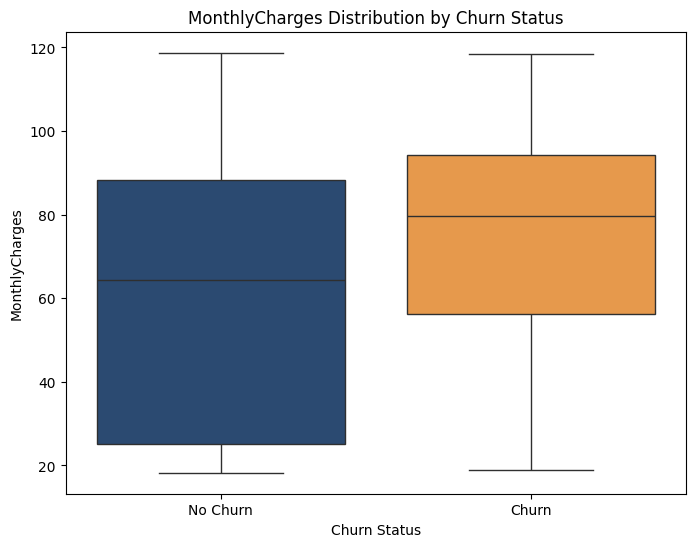


MonthlyCharges Statistics - Churned vs. Non-Churned:
        mean  median
Churn               
0      61.27   64.43
1      74.44   79.65
  💡 INSIGHT: Churned customers have 21.5% higher MonthlyCharges on average
----------------------------------------


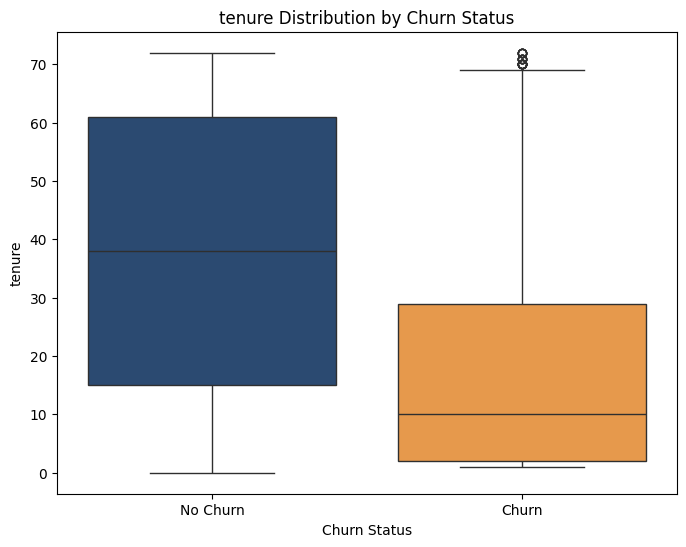


tenure Statistics - Churned vs. Non-Churned:
        mean  median
Churn               
0      37.57    38.0
1      17.98    10.0
  💡 INSIGHT: Churned customers have 52.1% lower tenure on average
----------------------------------------


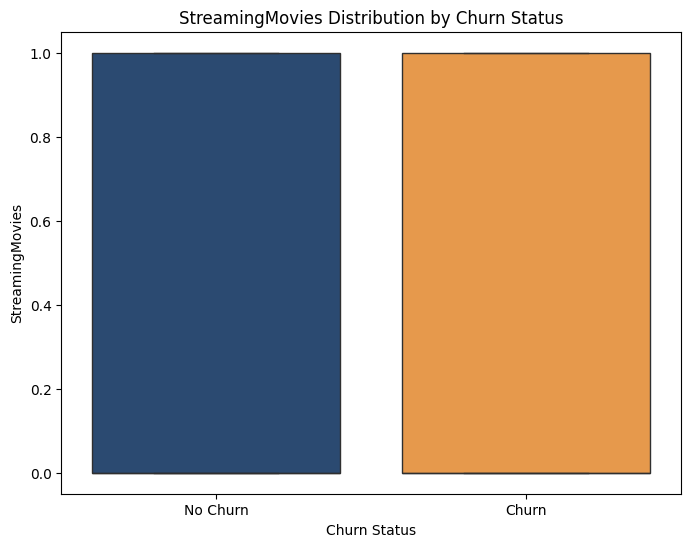


StreamingMovies Statistics - Churned vs. Non-Churned:
       mean  median
Churn              
0      0.37     0.0
1      0.44     0.0
----------------------------------------


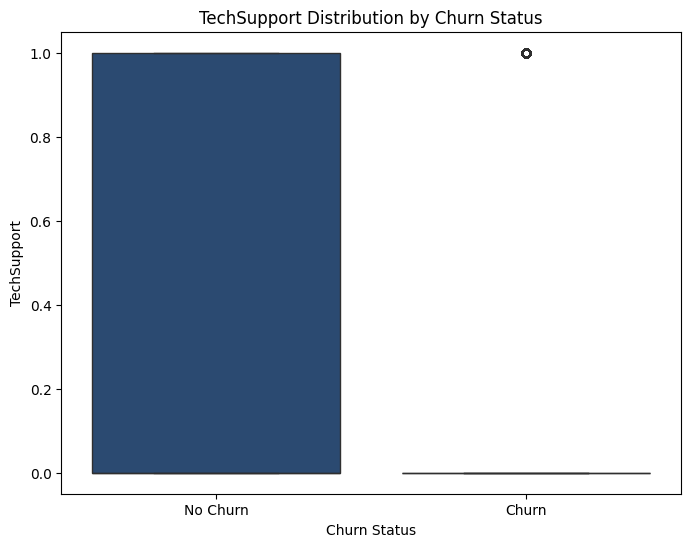


TechSupport Statistics - Churned vs. Non-Churned:
       mean  median
Churn              
0      0.34     0.0
1      0.17     0.0
  💡 INSIGHT: Churned customers have 50.0% lower TechSupport on average
----------------------------------------


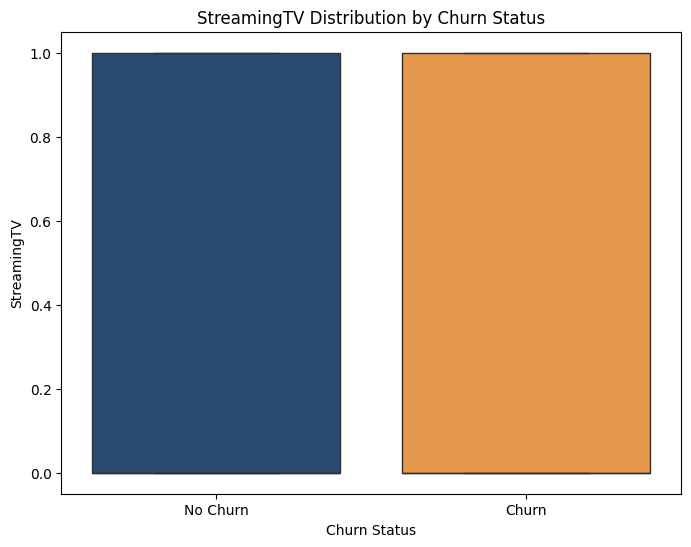


StreamingTV Statistics - Churned vs. Non-Churned:
       mean  median
Churn              
0      0.37     0.0
1      0.44     0.0
----------------------------------------


In [60]:
# --- 4.3 Bivariate Analysis (Relationships with Churn) ---

print("\n--- Bivariate Analysis (Feature vs. Churn) ---")

# Define custom color palette (if not already defined)
COLORS = {
    'primary_deep': '#1F497D',      # Deep Blue - for main data
    'primary_medium': '#4A7ABF',    # Medium Blue - for variations
    'primary_light': '#7DA0D9',     # Light Blue - for secondary data
    'accent_orange': '#FF9933'      # Orange - for highlighting/alerts
}

# Create churn palette: Deep Blue for No Churn, Orange for Churn (alert)
churn_palette = [COLORS['primary_deep'], COLORS['accent_orange']]

# Categorical Features vs. Churn
for col in categorical_cols:
    if col in df.columns and col != 'Churn':
        plt.figure(figsize=(5, 4))
        # Use custom churn palette: Deep blue for stable customers, Orange for churn (alert)
        ax = sns.countplot(x=col, hue='Churn', data=df, palette=churn_palette, 
                          order=df[col].value_counts().index, legend=False)
        
        # Add value labels on top of each bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
        
        plt.title(f'Churn Distribution by {col}')
        plt.xlabel(col)
        plt.ylabel('Number of Customers')
        # Remove rotation for better readability
        plt.xticks(rotation=0)
        # Add custom legend
        plt.legend(title='Churn', labels=['No Churn', 'Churn'], loc='upper right')
        plt.tight_layout()
        plt.show()

        # Print churn rate per category with highlighting for high churn rates
        churn_rate = df.groupby(col)['Churn'].mean() * 100
        print(f"\nChurn Rate by {col}:")
        churn_rate_sorted = churn_rate.sort_values(ascending=False).round(2)
        
        # Highlight categories with high churn rates (>30%)
        for category, rate in churn_rate_sorted.items():
            if rate > 30:
                print(f"  {category}: {rate}% ⚠️  HIGH CHURN")
            else:
                print(f"  {category}: {rate}%")
        print("-" * 40)

# Numerical Features vs. Churn
for col in numerical_cols:
    if col in df.columns and col != 'Churn':
        plt.figure(figsize=(8, 6))
        # Use custom churn palette for boxplots - fix future warning
        ax = sns.boxplot(x='Churn', y=col, data=df, palette=churn_palette, legend=False)
        plt.title(f'{col} Distribution by Churn Status')
        plt.xlabel('Churn Status')
        plt.ylabel(col)
        plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
        plt.show()

        # Compare mean/median for churned vs non-churned with insights
        stats_comparison = df.groupby('Churn')[col].agg(['mean', 'median']).round(2)
        print(f"\n{col} Statistics - Churned vs. Non-Churned:")
        print(stats_comparison)
        
        # Calculate and highlight significant differences
        no_churn_mean = stats_comparison.loc[0, 'mean']
        churn_mean = stats_comparison.loc[1, 'mean']
        percent_diff = ((churn_mean - no_churn_mean) / no_churn_mean * 100) if no_churn_mean != 0 else 0
        
        if abs(percent_diff) > 20:  # Highlight if >20% difference
            direction = "higher" if percent_diff > 0 else "lower"
            print(f"  💡 INSIGHT: Churned customers have {abs(percent_diff):.1f}% {direction} {col} on average")
        
        print("-" * 40)

In [62]:
import matplotlib.colors as mcolors


--- Multivariate Analysis & Unique Angle Insights ---


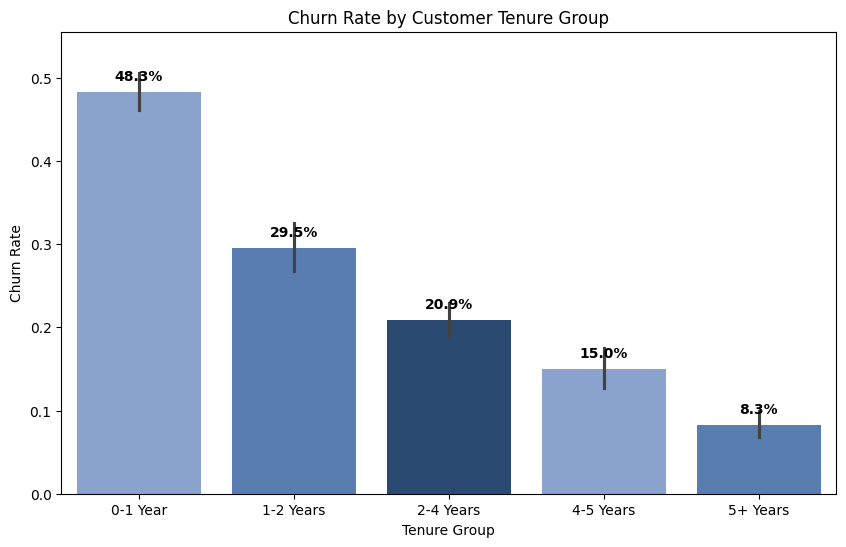


Churn Rate by Tenure Group:
  0-1 Year: 48.28% ⚠️  HIGH CHURN
  1-2 Years: 29.51%
  2-4 Years: 20.87%
  4-5 Years: 15.0%
  5+ Years: 8.3%
----------------------------------------


<Figure size 1200x700 with 0 Axes>

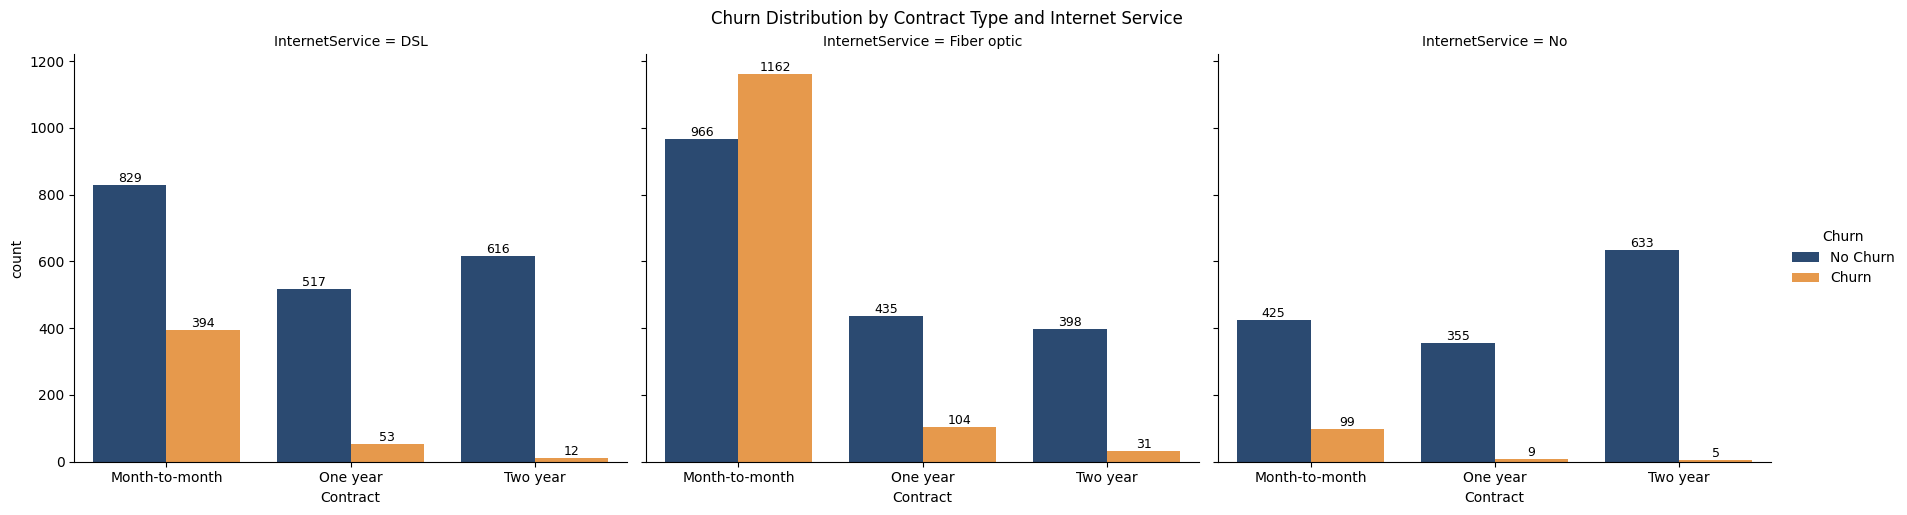


Churn Rate by Contract Type and Internet Service:
InternetService    DSL  Fiber optic     No
Contract                                  
Month-to-month   32.22        54.61  18.89
One year          9.30        19.29   2.47
Two year          1.91         7.23   0.78
----------------------------------------


<Figure size 1400x700 with 0 Axes>

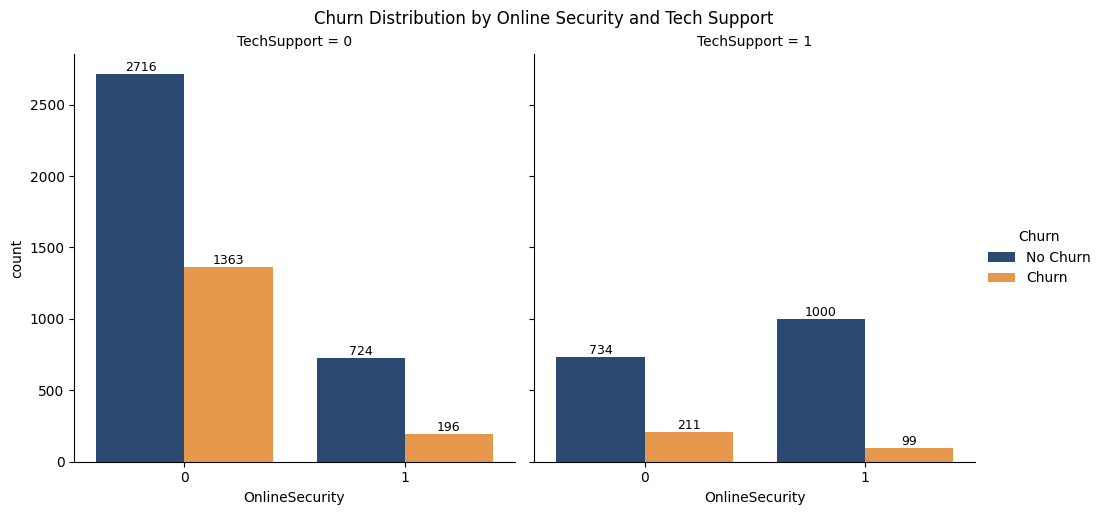


Churn Rate by Online Security and Tech Support:
TechSupport         0      1
OnlineSecurity              
0               33.42  22.33
1               21.30   9.01
----------------------------------------


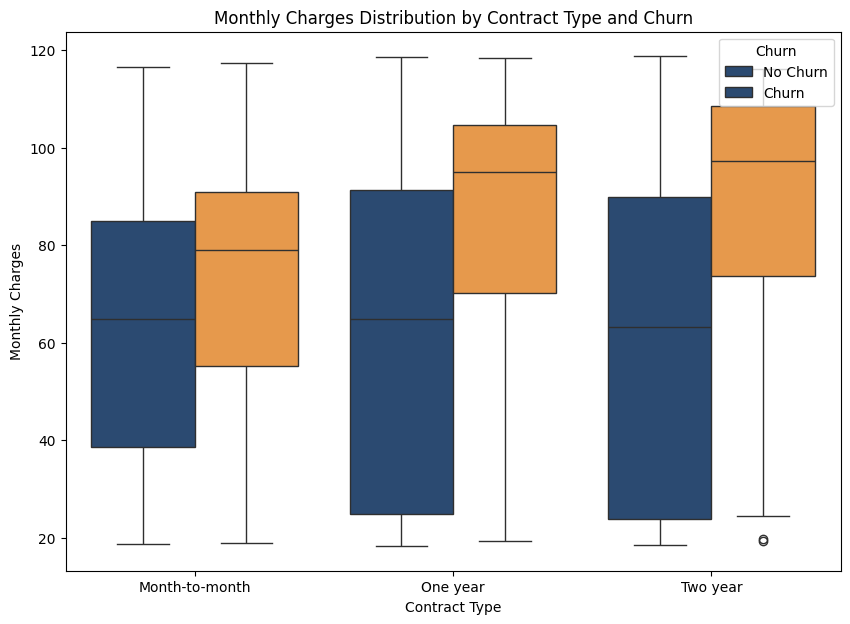


Mean Monthly Charges by Contract Type and Churn:
Churn               0      1
Contract                    
Month-to-month  61.46  73.02
One year        62.51  85.05
Two year        60.01  86.78
----------------------------------------

--- Correlation Matrix of Numerical Features ---


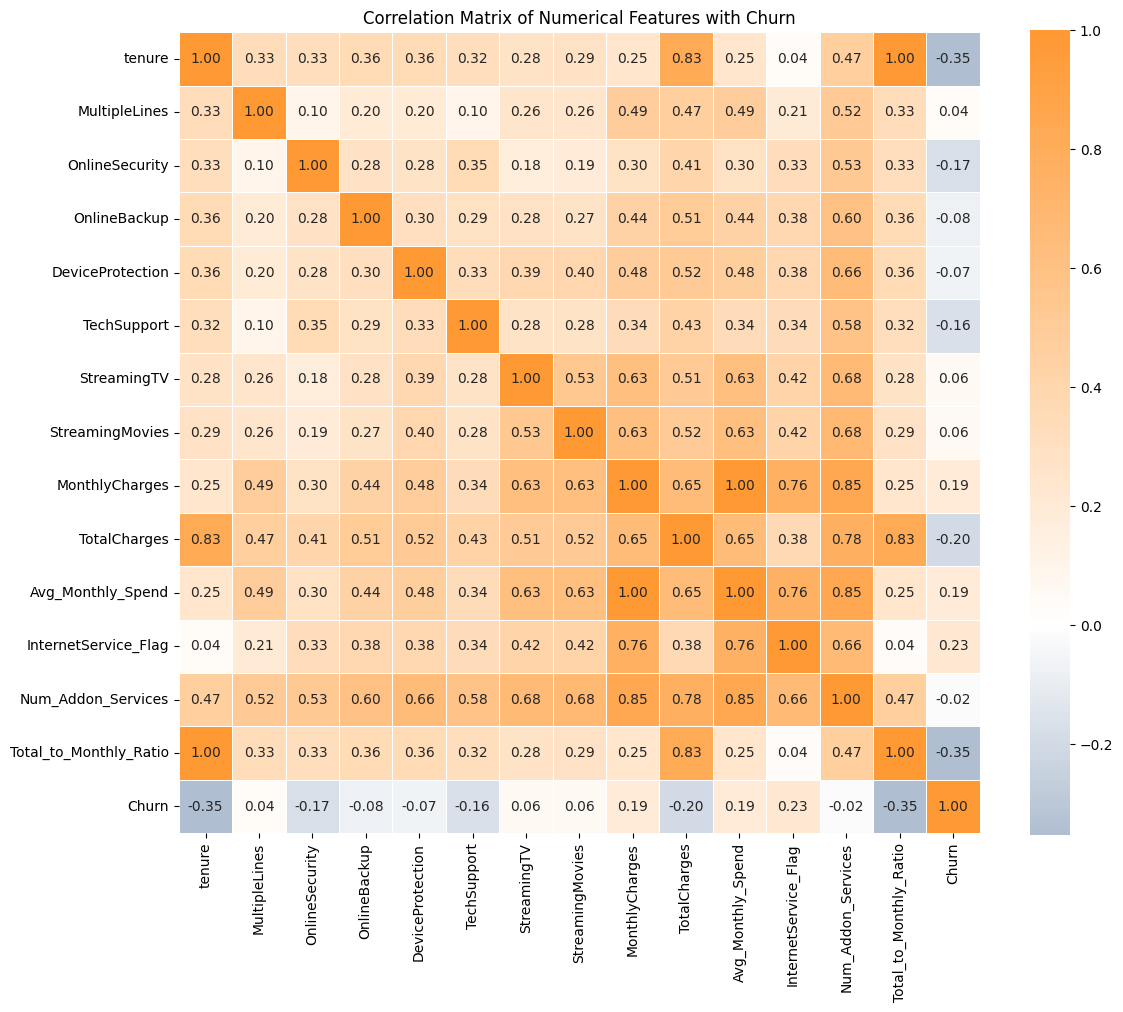


Correlation of Features with Churn:
  InternetService_Flag: 0.228
  MonthlyCharges: 0.193
  Avg_Monthly_Spend: 0.193
  StreamingTV: 0.063
  StreamingMovies: 0.061
  MultipleLines: 0.040
  Num_Addon_Services: -0.019
  DeviceProtection: -0.066
  OnlineBackup: -0.082
  TechSupport: -0.165
  OnlineSecurity: -0.171
  TotalCharges: -0.198
  Total_to_Monthly_Ratio: -0.352 💡 MODERATE negative correlation
  tenure: -0.352 💡 MODERATE negative correlation
----------------------------------------

--- EDA Complete! ---
Review the plots and printed tables for insights.


In [63]:
# --- 4.4 Multivariate Analysis & Unique Angle Insights ---

print("\n--- Multivariate Analysis & Unique Angle Insights ---")

# Define custom color palette (if not already defined)
COLORS = {
    'primary_deep': '#1F497D',      # Deep Blue - for main data
    'primary_medium': '#4A7ABF',    # Medium Blue - for variations
    'primary_light': '#7DA0D9',     # Light Blue - for secondary data
    'accent_orange': '#FF9933'      # Orange - for highlighting/alerts
}

# Create churn palette and gradient palettes
churn_palette = [COLORS['primary_deep'], COLORS['accent_orange']]
blue_gradient = [COLORS['primary_light'], COLORS['primary_medium'], COLORS['primary_deep']]

# Churn Rate by Tenure Group (Unique Angle: Lifecycle Impact)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tenure_Group', y='Churn', data=df, palette=blue_gradient, 
                order=labels, legend=False)

# Add value labels on bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.1%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Churn Rate by Customer Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.ylim(0, max(df.groupby('Tenure_Group')['Churn'].mean()) * 1.15)  # Add space for labels
plt.show()

print("\nChurn Rate by Tenure Group:")
churn_by_tenure = df.groupby('Tenure_Group')['Churn'].mean().mul(100).round(2)
for group, rate in churn_by_tenure.items():
    if rate > 40:
        print(f"  {group}: {rate}% ⚠️  HIGH CHURN")
    else:
        print(f"  {group}: {rate}%")
print("-" * 40)

# Churn Rate by Internet Service and Contract Type (Segment-Specific Drivers)
plt.figure(figsize=(12, 7))
g = sns.catplot(x='Contract', hue='Churn', col='InternetService', data=df, kind='count',
                height=5, aspect=1.2, palette=churn_palette, legend=False)

# Add value labels to each subplot
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

# Add custom legend to the figure
g.add_legend(title='Churn', labels=['No Churn', 'Churn'])
plt.suptitle('Churn Distribution by Contract Type and Internet Service', y=1.02)
plt.show()

print("\nChurn Rate by Contract Type and Internet Service:")
churn_contract_internet = df.groupby(['Contract', 'InternetService'])['Churn'].mean().mul(100).unstack().round(2)
print(churn_contract_internet)
print("-" * 40)

# Impact of OnlineSecurity and TechSupport on Churn (Key Add-on Services)
plt.figure(figsize=(14, 7))
g2 = sns.catplot(x='OnlineSecurity', hue='Churn', col='TechSupport', data=df, kind='count',
                 height=5, aspect=1, palette=churn_palette, legend=False)

# Add value labels to each subplot
for ax in g2.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

g2.add_legend(title='Churn', labels=['No Churn', 'Churn'])
plt.suptitle('Churn Distribution by Online Security and Tech Support', y=1.02)
plt.show()

print("\nChurn Rate by Online Security and Tech Support:")
churn_security_support = df.groupby(['OnlineSecurity', 'TechSupport'])['Churn'].mean().mul(100).unstack().round(2)
print(churn_security_support)
print("-" * 40)

# Churn vs. MonthlyCharges and Contract Type (Spending Habits)
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df, 
                palette=churn_palette, legend=False)
plt.title('Monthly Charges Distribution by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', labels=['No Churn', 'Churn'], loc='upper right')
plt.show()

print("\nMean Monthly Charges by Contract Type and Churn:")
charges_analysis = df.groupby(['Contract', 'Churn'])['MonthlyCharges'].mean().unstack().round(2)
print(charges_analysis)
print("-" * 40)

# Correlation Matrix for Numerical Features
print("\n--- Correlation Matrix of Numerical Features ---")
# Select only numerical columns for correlation calculation
numerical_for_corr = df.select_dtypes(include=np.number).columns.tolist()
# Exclude binary flags from this specific correlation plot if they dominate
exclude_from_corr_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
numerical_for_corr = [col for col in numerical_for_corr if col not in exclude_from_corr_plot]
numerical_for_corr.append('Churn') # Always include target variable

plt.figure(figsize=(12, 10))
# Create custom colormap: blue to white to orange
colors = [COLORS['primary_deep'], 'white', COLORS['accent_orange']]
n_bins = 256
cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

sns.heatmap(df[numerical_for_corr].corr(), annot=True, cmap=cmap, fmt=".2f", 
            linewidths=.5, center=0, square=True)
plt.title('Correlation Matrix of Numerical Features with Churn')
plt.tight_layout()
plt.show()

# Print correlations with Churn specifically with insights
print("\nCorrelation of Features with Churn:")
churn_correlations = df[numerical_for_corr].corr()['Churn'].sort_values(ascending=False)
for feature, corr in churn_correlations.items():
    if feature != 'Churn':
        if abs(corr) > 0.3:
            strength = "STRONG" if abs(corr) > 0.5 else "MODERATE"
            direction = "positive" if corr > 0 else "negative"
            print(f"  {feature}: {corr:.3f} 💡 {strength} {direction} correlation")
        else:
            print(f"  {feature}: {corr:.3f}")
print("-" * 40)

print("\n--- EDA Complete! ---")
print("Review the plots and printed tables for insights.")